In [5]:
"""
Created on Tue Nov  19 14:53:14 2024

@author: sofi
"""

'\nCreated on Tue Nov  19 14:53:14 2024\n\n@author: sofi\n'

## Append the data values from the survey into arrays

In [6]:
# files = glob.glob('../data/*.fits')
import pickle
import numpy as np
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from fitting_functions import *
import glob
from astropy.constants import c
from astropy.io import ascii
import astropy.units as u
from Borg_emission_lines import lines
import pickle
import random
import pprint
import os

# BoRG Survey Pipeline

In [8]:
borg_ids = ['2426_112','2426_1736','2426_1130','2426_1777','2426_169','2426_1690','2426_1655','1747_199','1747_732','1747_902','1747_1081','1747_817','1747_1425','1747_138']

In [9]:
os.getcwd()

'c:\\Users\\isaia\\Downloads'

In [10]:
file_spec = 'spectra_13Dec2024_full.p'
with open(file_spec, 'rb') as file:
    data_spec = pickle.load(file)

In [11]:
tab = ascii.read('highz_msaid_public.dat')
all_fit_results = []

In [12]:
'''
example_galaxy = list(data.keys())[0]
if isinstance(data[example_galaxy], dict):
    print("Column keys:", data[example_galaxy].keys())
    # Peek at values
    for k in data[example_galaxy].keys():
        print(f"{k}: {data[example_galaxy][k]}")
'''

'\nexample_galaxy = list(data.keys())[0]\nif isinstance(data[example_galaxy], dict):\n    print("Column keys:", data[example_galaxy].keys())\n    # Peek at values\n    for k in data[example_galaxy].keys():\n        print(f"{k}: {data[example_galaxy][k]}")\n'

## Data Extraction Code (BORG Survey)

In [13]:
import os 
print("Working directory:", os.getcwd())

Working directory: c:\Users\isaia\Downloads


2426_112 7.337
{'lam': array([0.58      , 0.58368511, 0.58743788, 0.59126022, 0.59515426,
       0.59912194, 0.60316525, 0.60728664, 0.61148833, 0.61577259,
       0.62014179, 0.62459864, 0.62914577, 0.63378584, 0.63852165,
       0.6433561 , 0.6482922 , 0.65333313, 0.6584822 , 0.66374277,
       0.66911831, 0.67461243, 0.68022885, 0.68597146, 0.69184423,
       0.6978513 , 0.70399693, 0.71028561, 0.71672191, 0.72331053,
       0.73005628, 0.73696412, 0.7440392 , 0.75128688, 0.75871251,
       0.76632159, 0.77411992, 0.7821132 , 0.79030739, 0.79870847,
       0.80732254, 0.81615575, 0.82521435, 0.83450455, 0.8440326 ,
       0.85380473, 0.8638271 , 0.87410579, 0.88464675, 0.89545572,
       0.90653824, 0.9178996 , 0.92954474, 0.94147818, 0.95370401,
       0.96622584, 0.97904675, 0.99216917, 1.00559465, 1.01932434,
       1.03335816, 1.04769562, 1.06233481, 1.07727331, 1.09250762,
       1.10803299, 1.12384392, 1.13993392, 1.15629547, 1.17292011,
       1.18979848, 1.20692039, 1.224274

c:\Users\isaia\anaconda3\Lib\site-packages\astropy\modeling\functional_models.py:218: RuntimeWarning: divide by zero encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)


RMS for 2426_112 in CIV_window: 0.4326
RMS for 2426_112 in OII_window: 0.1854
RMS for 2426_112 in Hb_OIII_window: 0.1606
Final results for 2426_112: dict_keys(['CIV_window_fit_rms', 'OII_window_fit_rms', 'Hb_OIII_window_fit_rms', '[OIII]_4959_flux', '[OIII]_4959_flux_err', 'Hgammma_OIII_flux', 'Hgammma_OIII_flux_err', '[NeIII]_flux', '[NeIII]_flux_err', 'Hepsilon_flux', 'Hepsilon_flux_err', 'Hbeta_flux', 'Hbeta_flux_err', 'MgI_5174_flux', 'MgI_5174_flux_err', 'Hdelta_flux', 'Hdelta_flux_err', 'CIV_doublet_flux', 'CIV_doublet_flux_err', '[OIII]_5007_flux', '[OIII]_5007_flux_err', 'CIII]_doublet_flux', 'CIII]_doublet_flux_err', 'OIII]_doublet_flux', 'OIII]_doublet_flux_err', '[OII]_doublet_flux', '[OII]_doublet_flux_err', 'NeIII_OII_ratio', 'NeIII_OII_ratio_err', 'OIII5007_Hbeta_ratio', 'OIII5007_Hbeta_ratio_err', 'Hdelta_Hbeta_ratio', 'Hdelta_Hbeta_ratio_err', 'Hgamma_Hbeta_ratio', 'Hgamma_Hbeta_ratio_err'])
2426_1736 7.822
{'lam': array([0.58      , 0.58368511, 0.58743788, 0.59126022, 

C:\Users\isaia\AppData\Local\Temp\ipykernel_12188\3392191783.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  iteration_ratios['NeIII_OII_ratio'] = iteration_fluxes['[NeIII]_flux'] / iteration_fluxes['[OII]_doublet_flux']
C:\Users\isaia\AppData\Local\Temp\ipykernel_12188\3392191783.py:113: RuntimeWarning: invalid value encountered in scalar divide
  iteration_ratios['NeIII_OII_ratio'] = iteration_fluxes['[NeIII]_flux'] / iteration_fluxes['[OII]_doublet_flux']
C:\Users\isaia\AppData\Local\Temp\ipykernel_12188\3392191783.py:116: RuntimeWarning: divide by zero encountered in scalar divide
  iteration_ratios['OIII5007_Hbeta_ratio'] = iteration_fluxes['[OIII]_5007_flux'] / iteration_fluxes['Hbeta_flux']
C:\Users\isaia\AppData\Local\Temp\ipykernel_12188\3392191783.py:119: RuntimeWarning: divide by zero encountered in scalar divide
  iteration_ratios['Hdelta_Hbeta_ratio'] = iteration_fluxes['Hdelta_flux'] / iteration_fluxes['Hbeta_flux']
C:\Users\isaia\AppData\Local\Temp\

RMS for 2426_1130 in CIV_window: 0.3944
RMS for 2426_1130 in OII_window: 0.2191
RMS for 2426_1130 in Hb_OIII_window: 0.2504
Final results for 2426_1130: dict_keys(['CIV_window_fit_rms', 'OII_window_fit_rms', 'Hb_OIII_window_fit_rms', '[OIII]_4959_flux', '[OIII]_4959_flux_err', 'Hgammma_OIII_flux', 'Hgammma_OIII_flux_err', '[NeIII]_flux', '[NeIII]_flux_err', 'Hepsilon_flux', 'Hepsilon_flux_err', 'Hbeta_flux', 'Hbeta_flux_err', 'Hdelta_flux', 'Hdelta_flux_err', 'CIV_doublet_flux', 'CIV_doublet_flux_err', '[OIII]_5007_flux', '[OIII]_5007_flux_err', 'CIII]_doublet_flux', 'CIII]_doublet_flux_err', 'OIII]_doublet_flux', 'OIII]_doublet_flux_err', '[OII]_doublet_flux', '[OII]_doublet_flux_err', 'NeIII_OII_ratio', 'NeIII_OII_ratio_err', 'OIII5007_Hbeta_ratio', 'OIII5007_Hbeta_ratio_err', 'Hdelta_Hbeta_ratio', 'Hdelta_Hbeta_ratio_err', 'Hgamma_Hbeta_ratio', 'Hgamma_Hbeta_ratio_err'])
2426_1777 8.44


c:\Users\isaia\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


{'lam': array([0.58      , 0.58368511, 0.58743788, 0.59126022, 0.59515426,
       0.59912194, 0.60316525, 0.60728664, 0.61148833, 0.61577259,
       0.62014179, 0.62459864, 0.62914577, 0.63378584, 0.63852165,
       0.6433561 , 0.6482922 , 0.65333313, 0.6584822 , 0.66374277,
       0.66911831, 0.67461243, 0.68022885, 0.68597146, 0.69184423,
       0.6978513 , 0.70399693, 0.71028561, 0.71672191, 0.72331053,
       0.73005628, 0.73696412, 0.7440392 , 0.75128688, 0.75871251,
       0.76632159, 0.77411992, 0.7821132 , 0.79030739, 0.79870847,
       0.80732254, 0.81615575, 0.82521435, 0.83450455, 0.8440326 ,
       0.85380473, 0.8638271 , 0.87410579, 0.88464675, 0.89545572,
       0.90653824, 0.9178996 , 0.92954474, 0.94147818, 0.95370401,
       0.96622584, 0.97904675, 0.99216917, 1.00559465, 1.01932434,
       1.03335816, 1.04769562, 1.06233481, 1.07727331, 1.09250762,
       1.10803299, 1.12384392, 1.13993392, 1.15629547, 1.17292011,
       1.18979848, 1.20692039, 1.2242749 , 1.2418504 ,

C:\Users\isaia\AppData\Local\Temp\ipykernel_12188\3392191783.py:177: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(7, 7))


RMS for 1747_199 in CIV_window: 0.215
RMS for 1747_199 in OII_window: 0.1023
RMS for 1747_199 in Hb_OIII_window: 0.2385
Final results for 1747_199: dict_keys(['CIV_window_fit_rms', 'OII_window_fit_rms', 'Hb_OIII_window_fit_rms', '[OIII]_4959_flux', '[OIII]_4959_flux_err', 'Hgammma_OIII_flux', 'Hgammma_OIII_flux_err', '[NeIII]_flux', '[NeIII]_flux_err', 'Hepsilon_flux', 'Hepsilon_flux_err', 'Hbeta_flux', 'Hbeta_flux_err', 'Hdelta_flux', 'Hdelta_flux_err', 'CIV_doublet_flux', 'CIV_doublet_flux_err', '[OIII]_5007_flux', '[OIII]_5007_flux_err', 'CIII]_doublet_flux', 'CIII]_doublet_flux_err', 'OIII]_doublet_flux', 'OIII]_doublet_flux_err', '[OII]_doublet_flux', '[OII]_doublet_flux_err', 'NeIII_OII_ratio', 'NeIII_OII_ratio_err', 'OIII5007_Hbeta_ratio', 'OIII5007_Hbeta_ratio_err', 'Hdelta_Hbeta_ratio', 'Hdelta_Hbeta_ratio_err', 'Hgamma_Hbeta_ratio', 'Hgamma_Hbeta_ratio_err'])
1747_732 8.226
{'lam': array([0.58      , 0.58368511, 0.58743788, 0.59126022, 0.59515426,
       0.59912194, 0.6031652

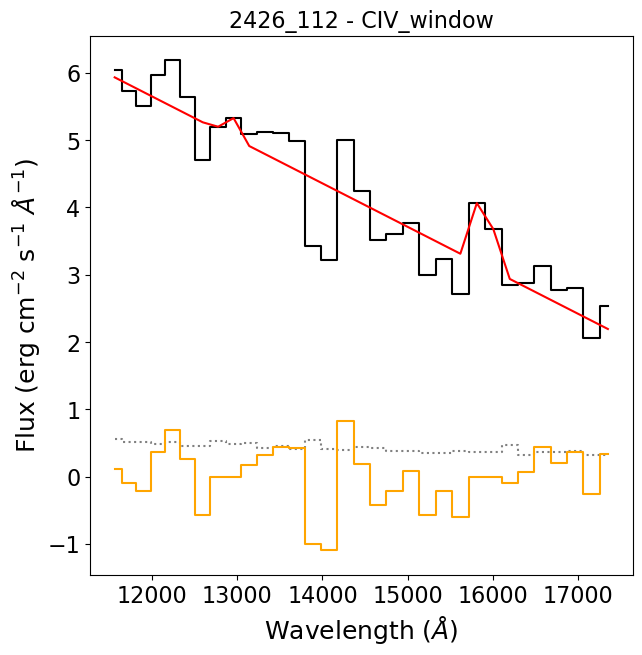

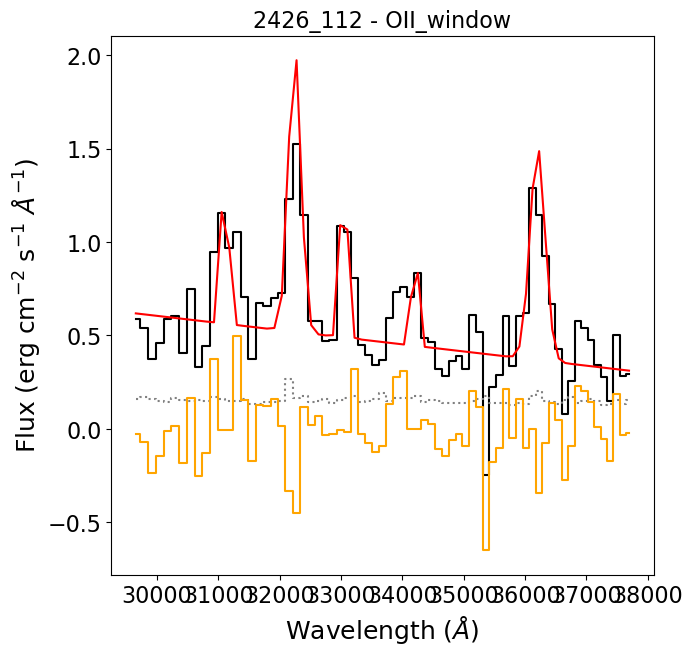

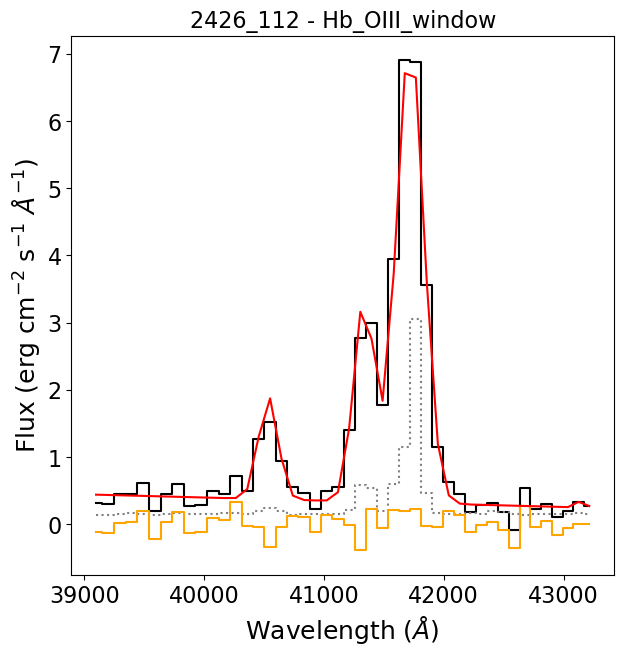

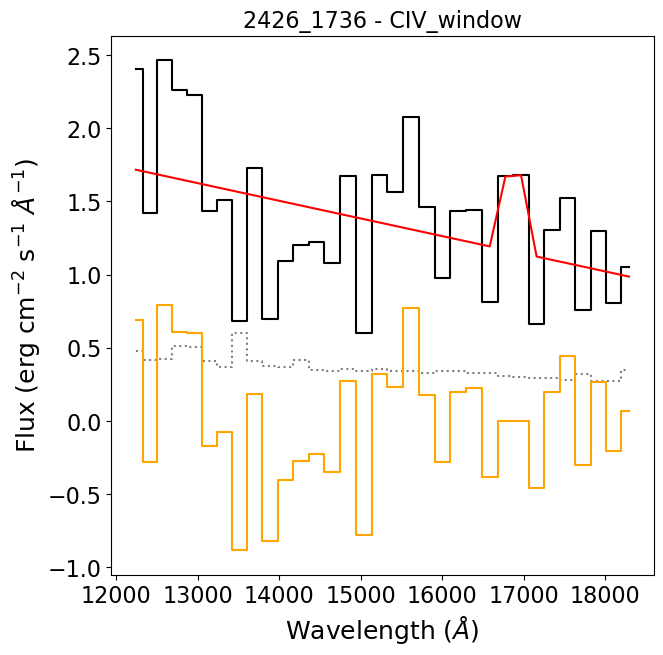

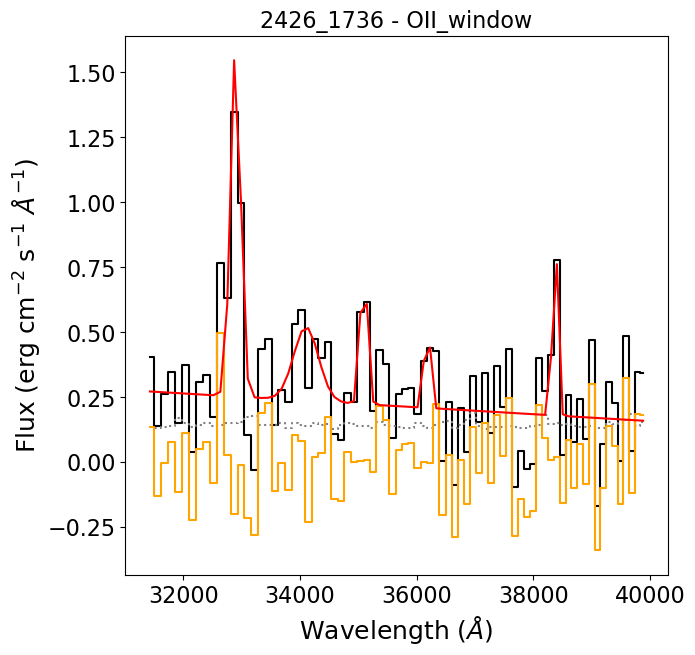

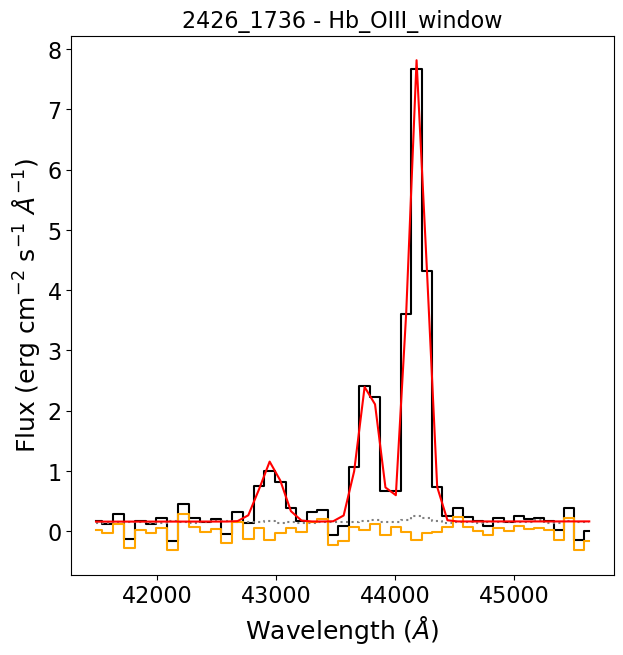

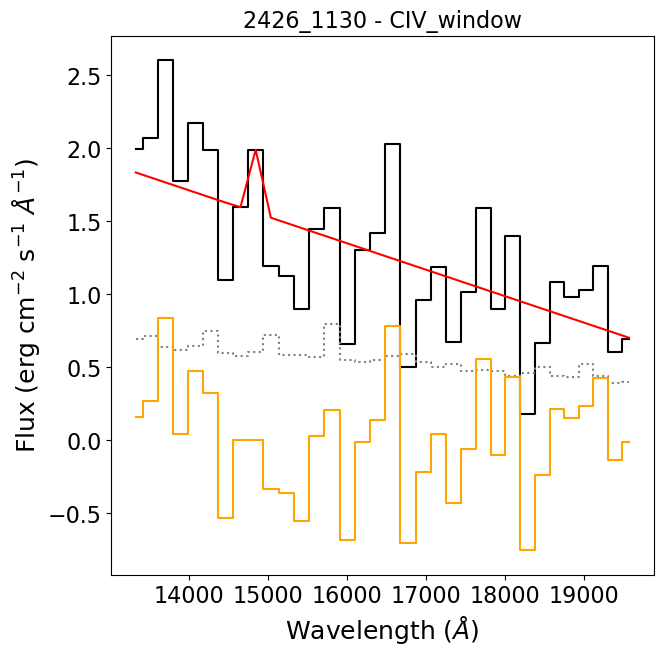

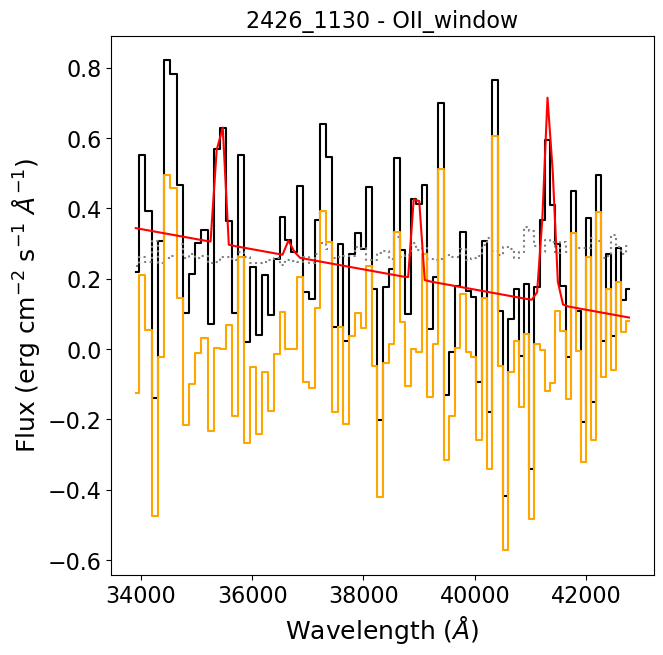

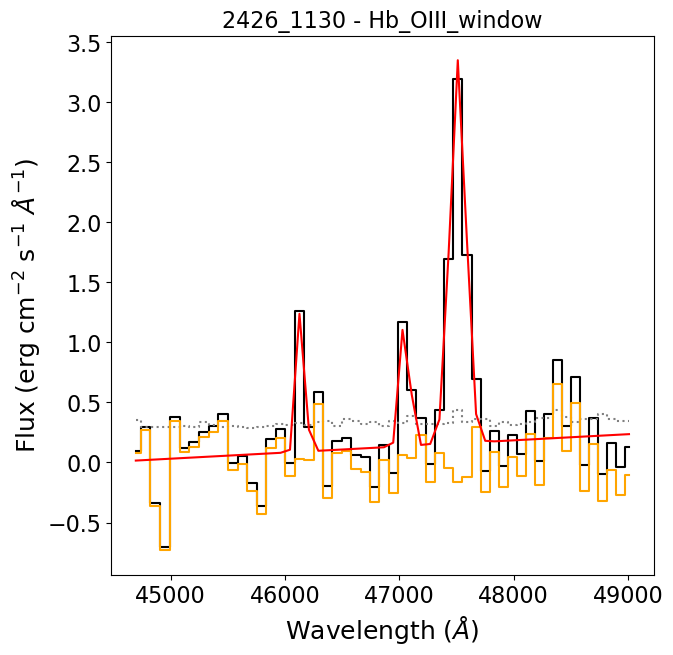

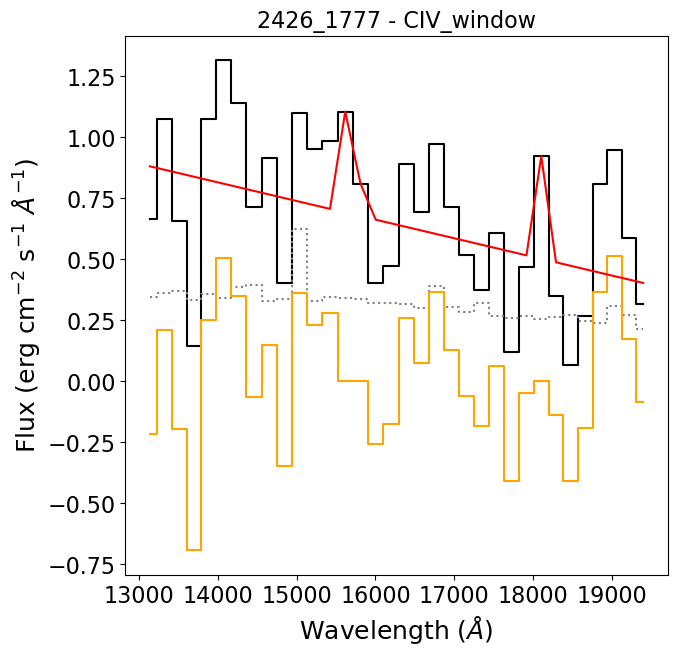

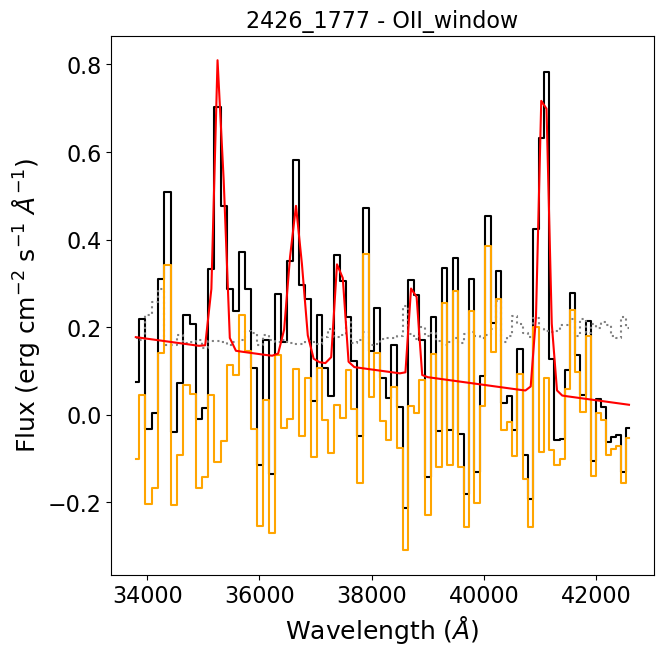

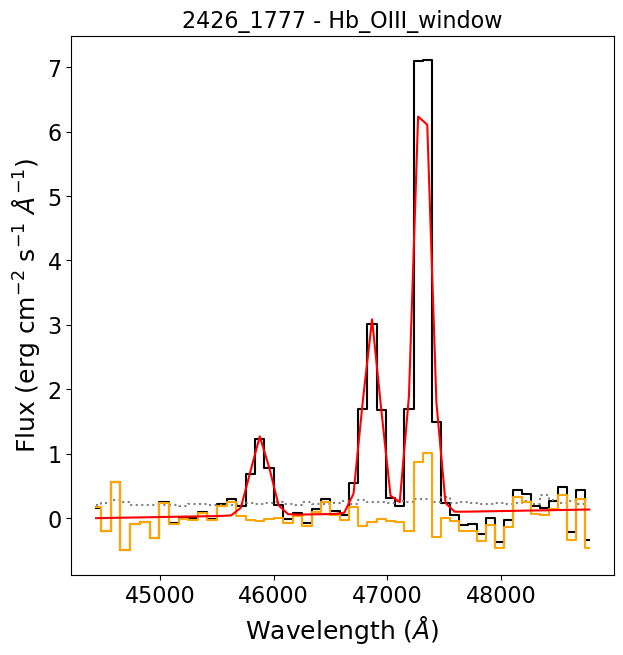

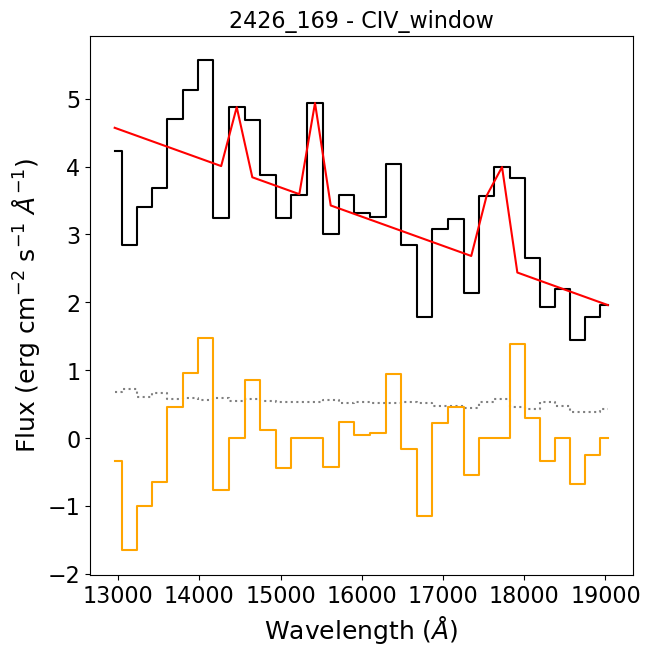

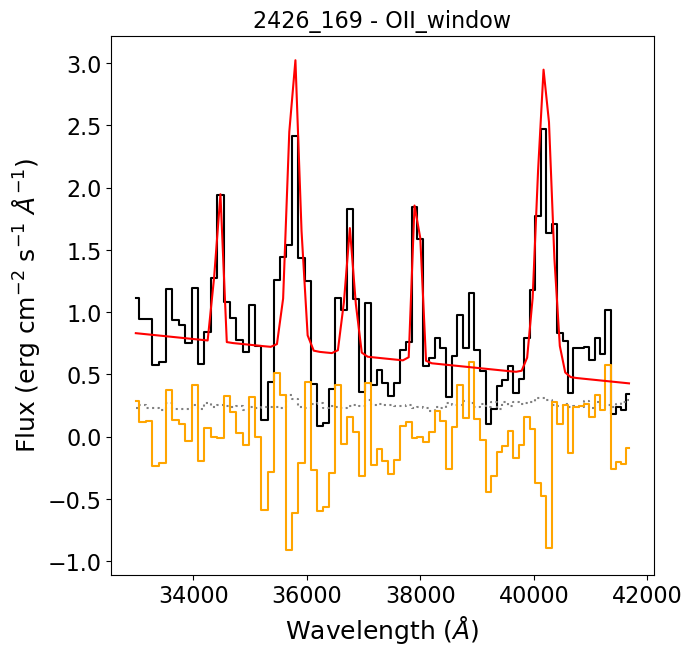

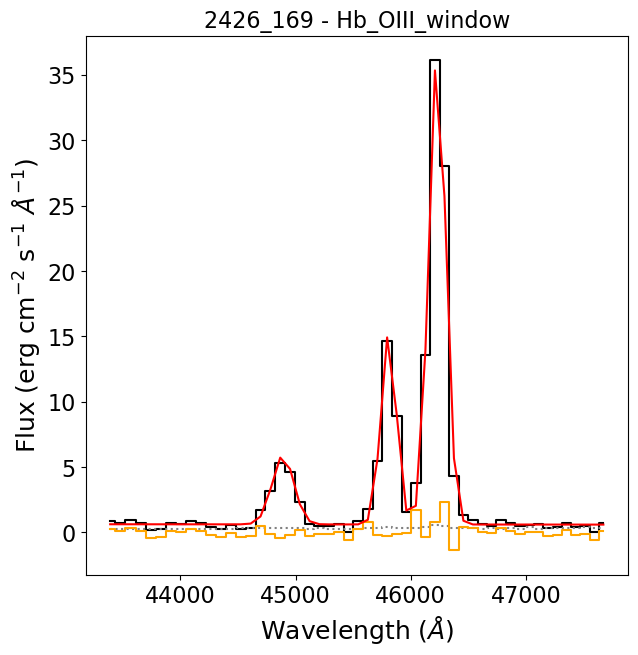

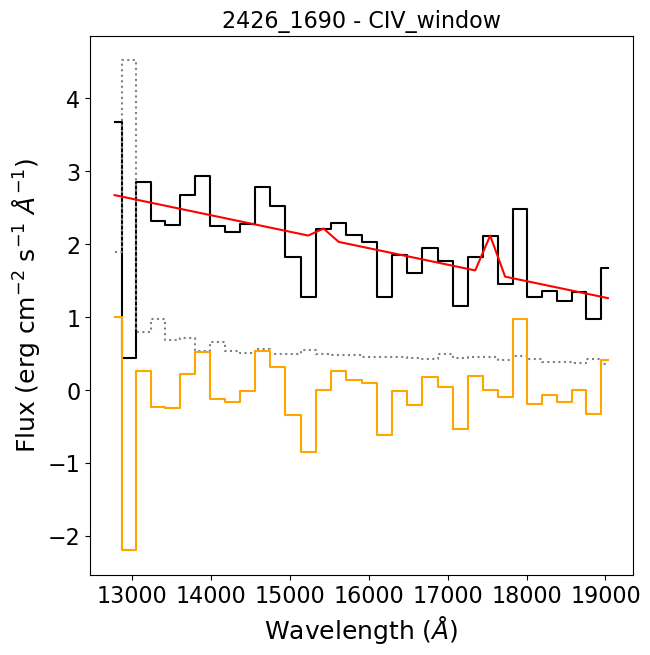

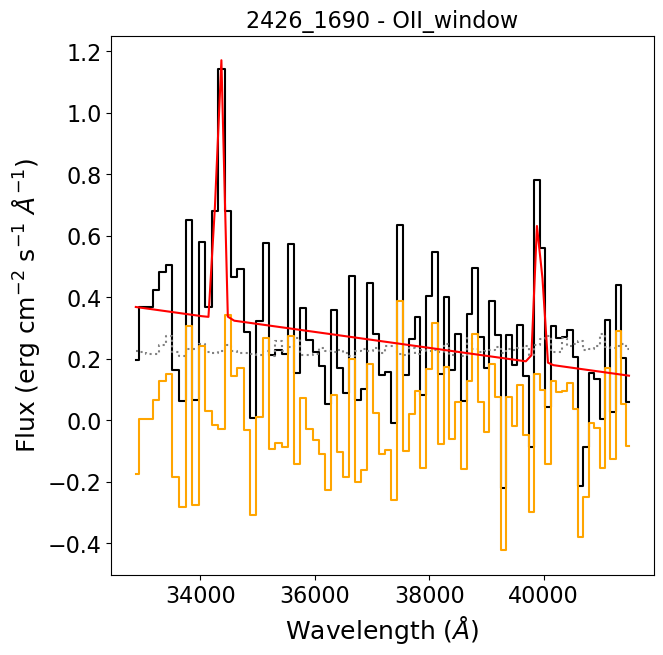

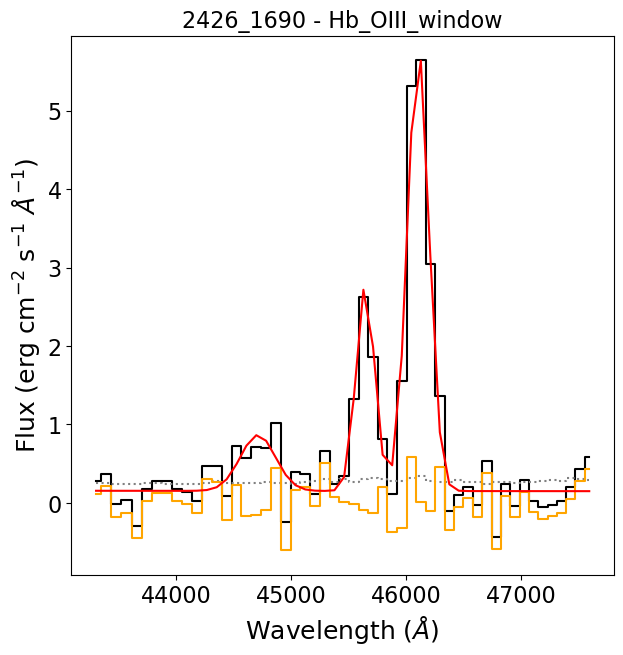

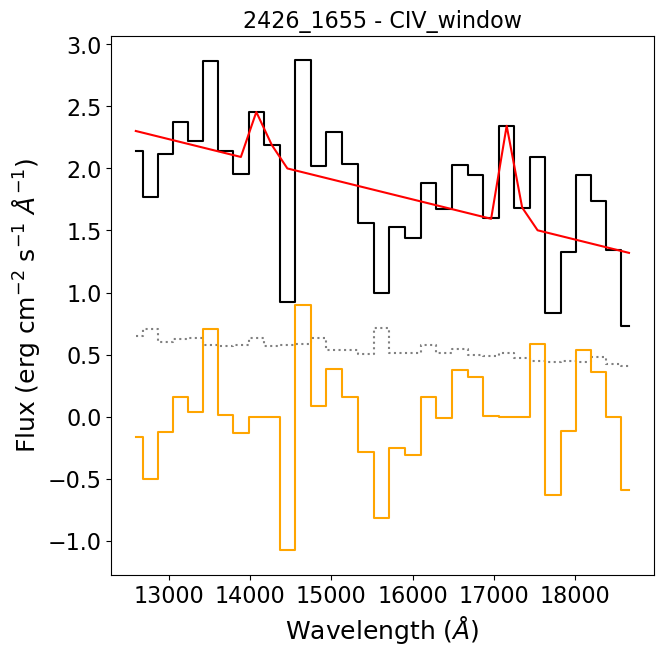

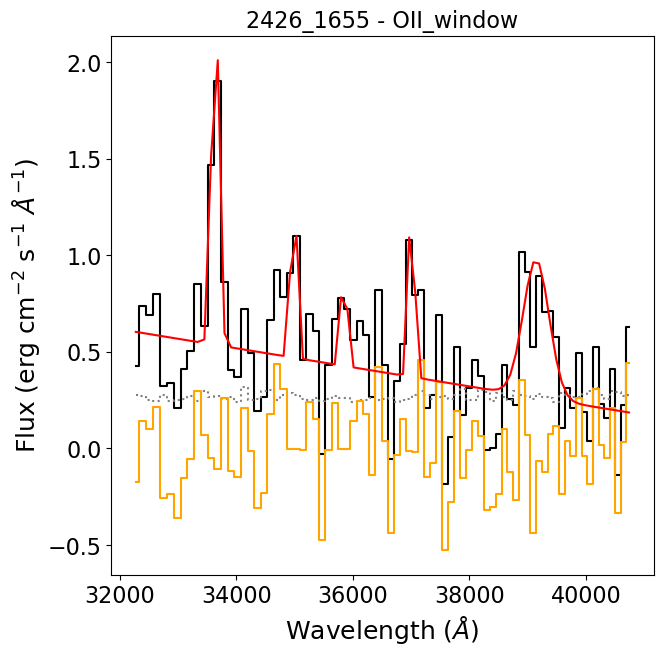

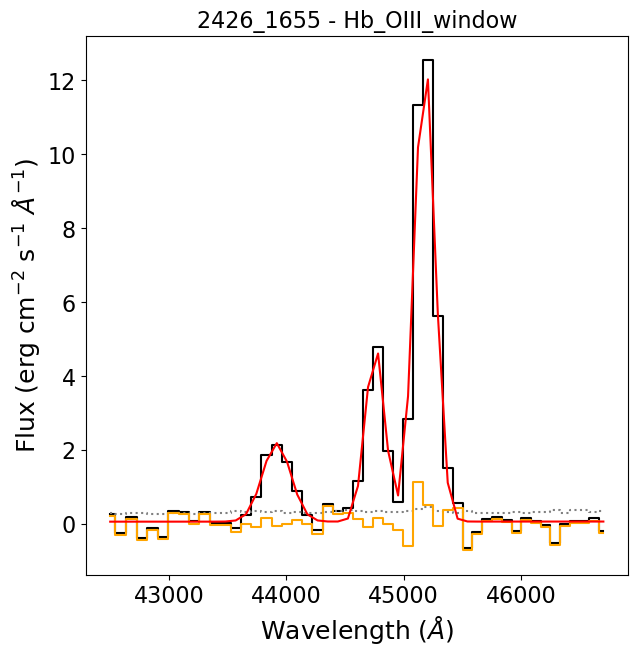

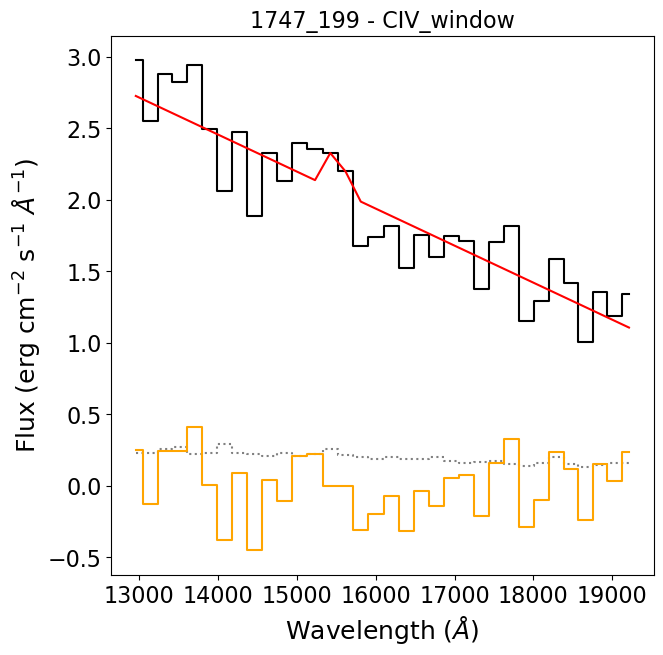

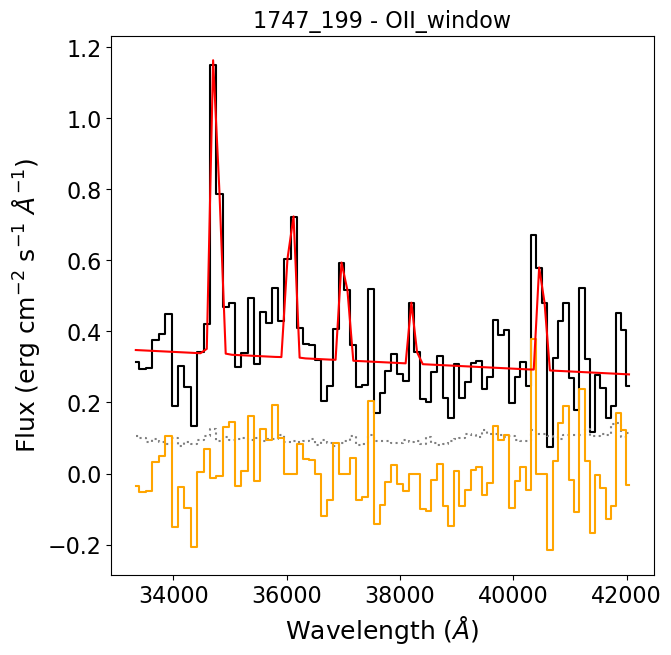

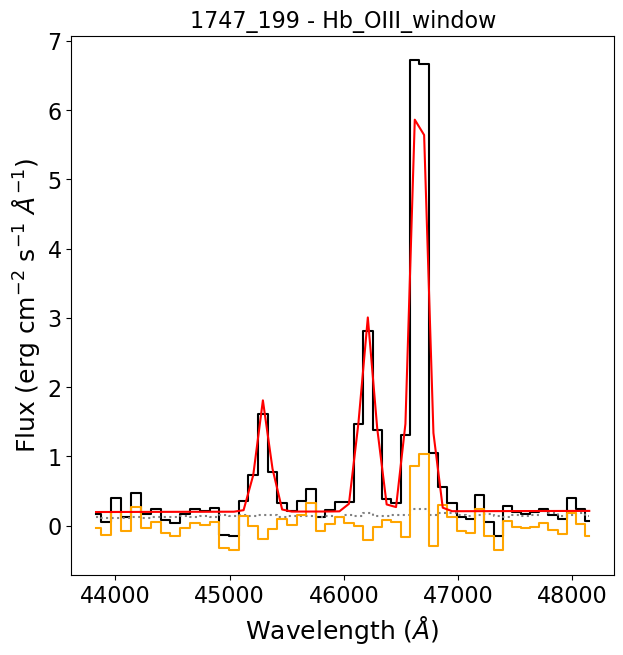

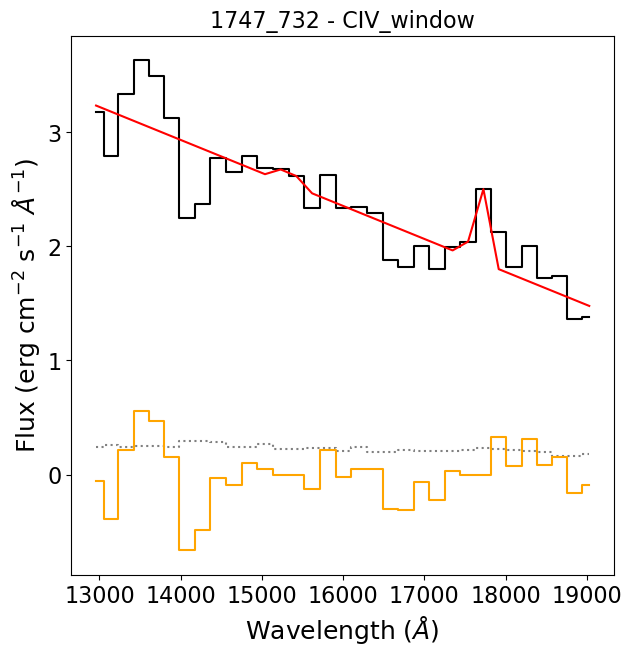

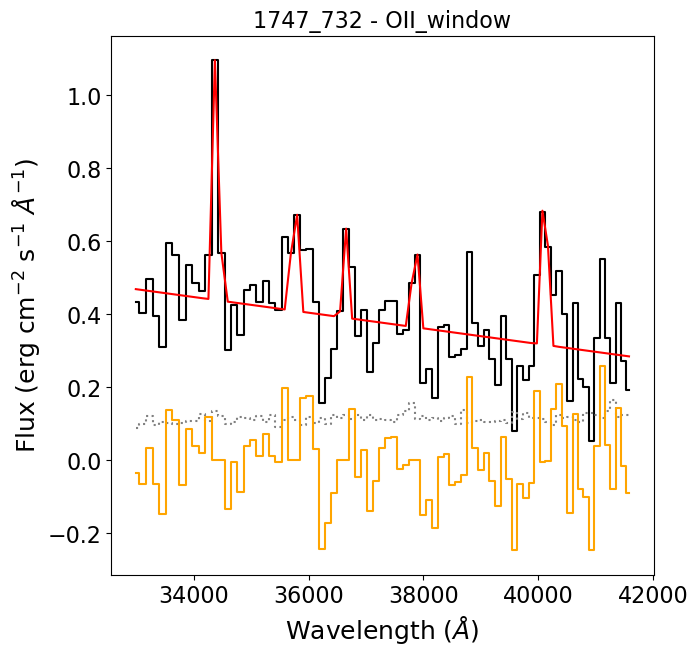

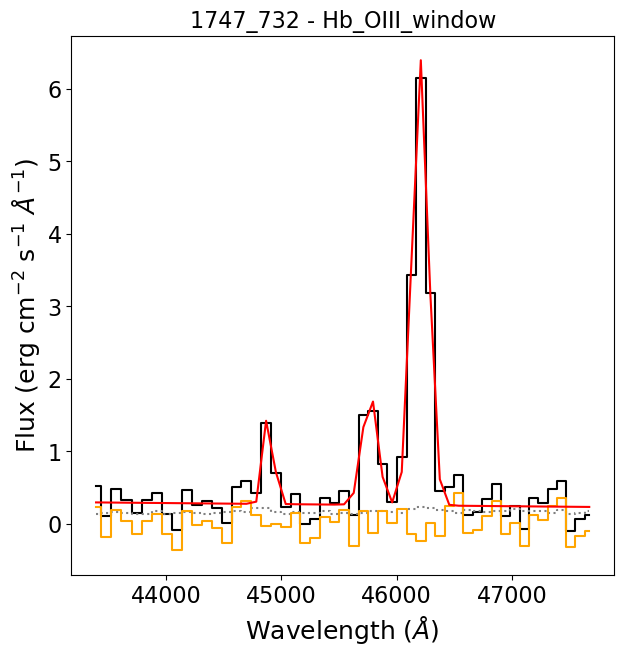

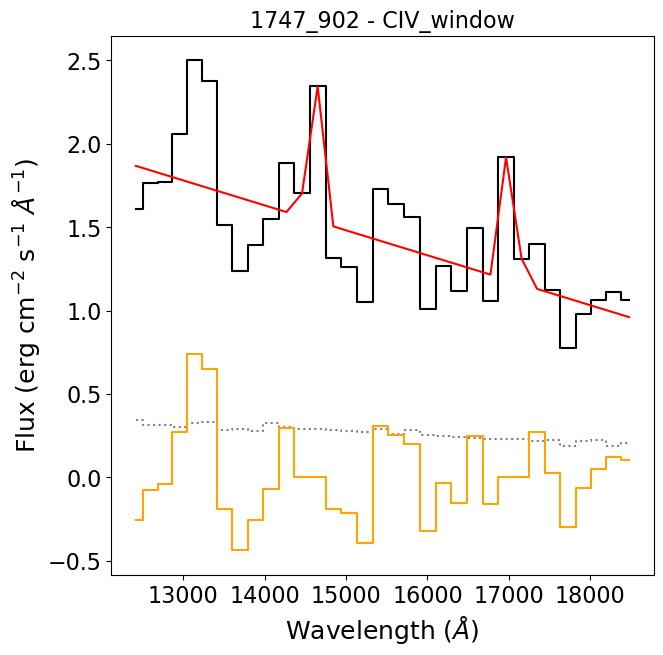

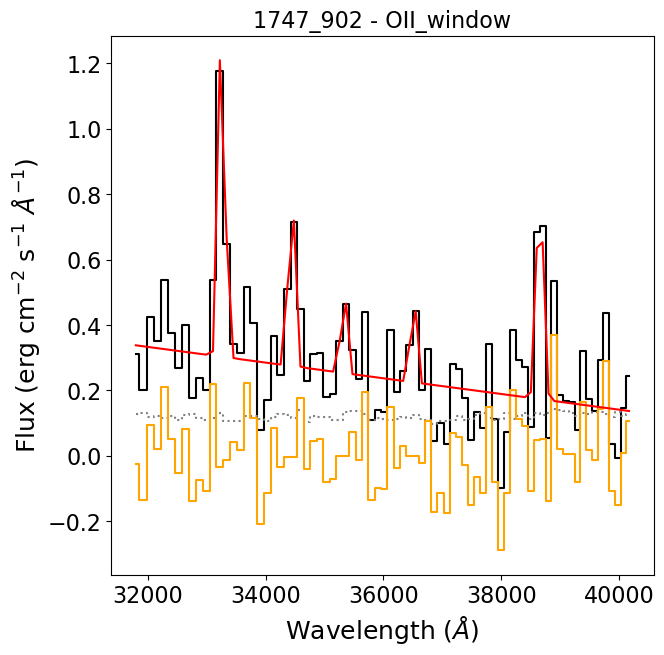

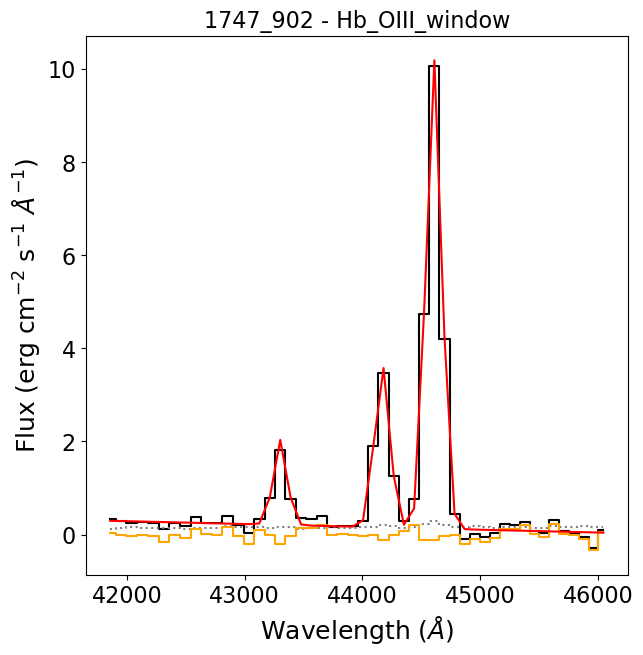

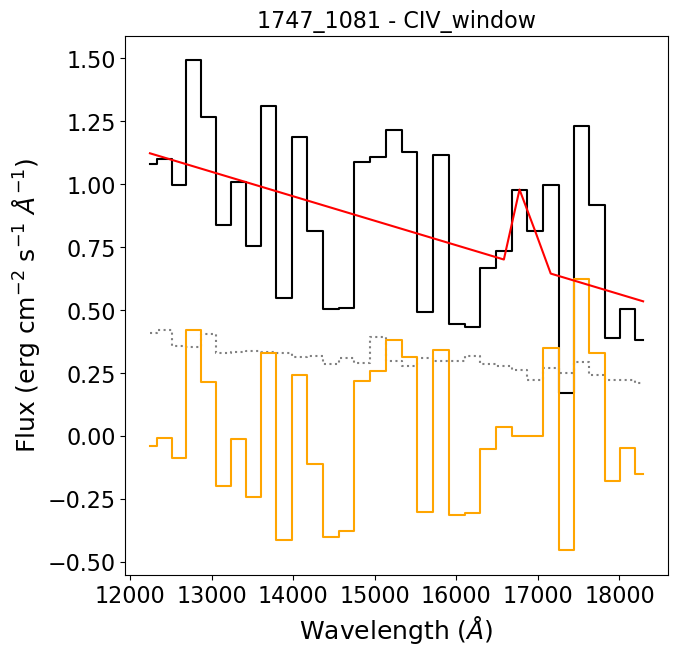

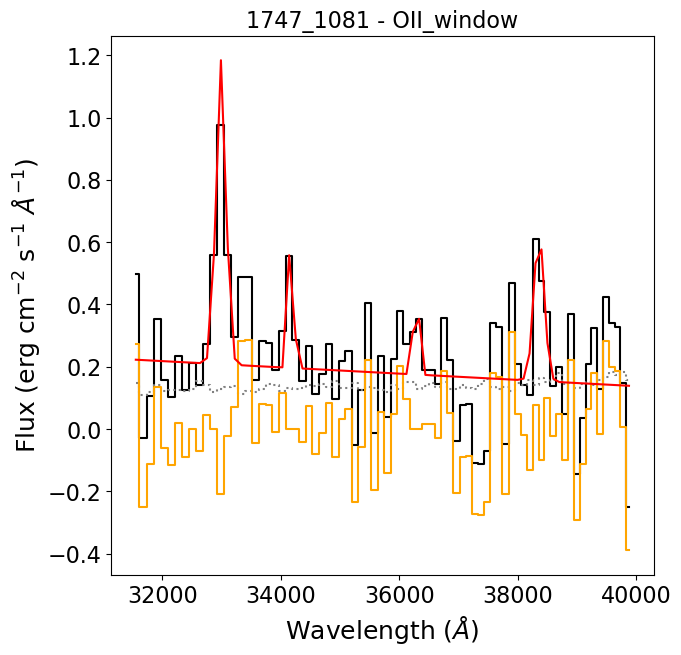

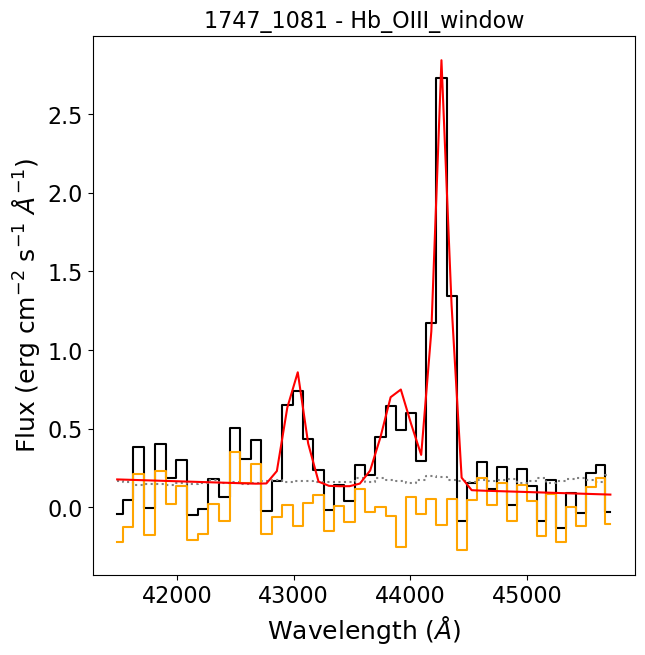

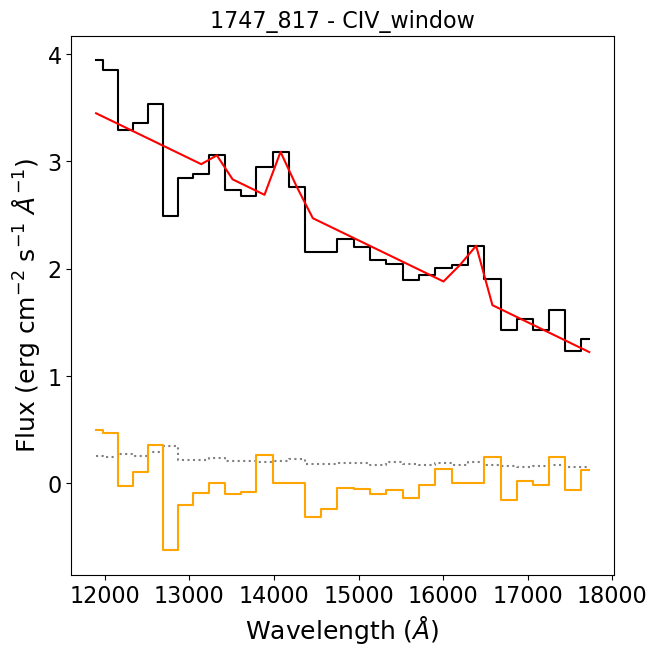

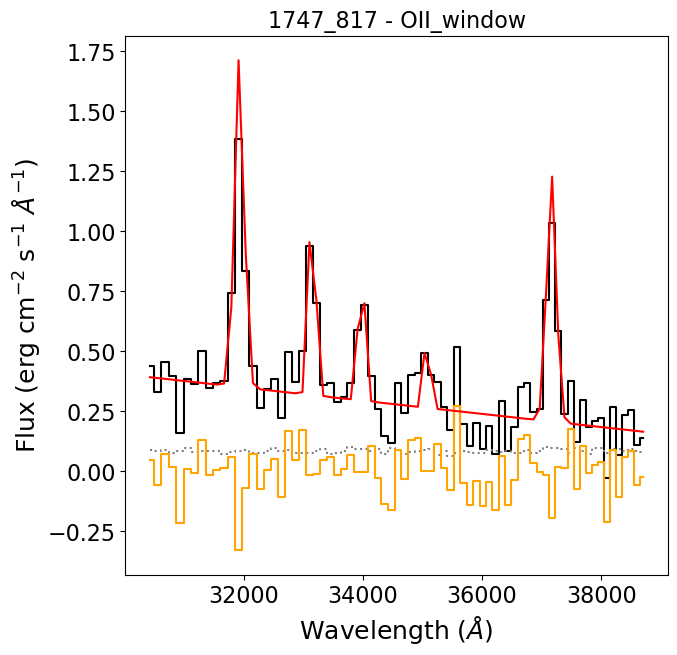

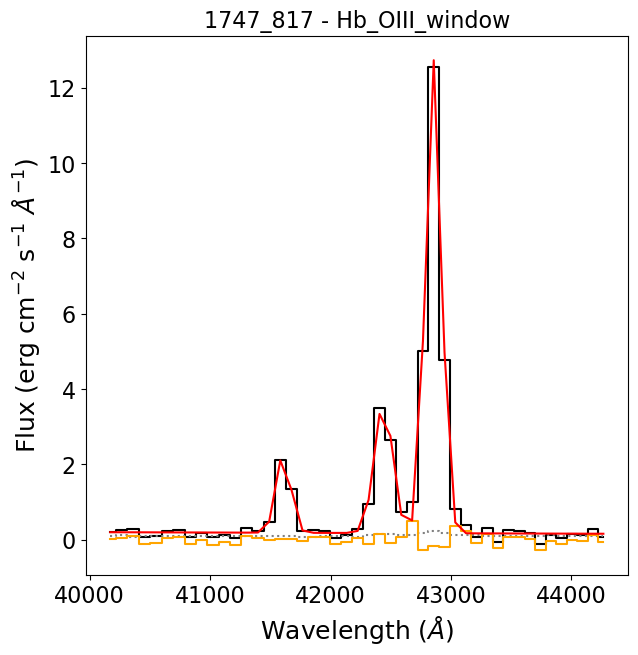

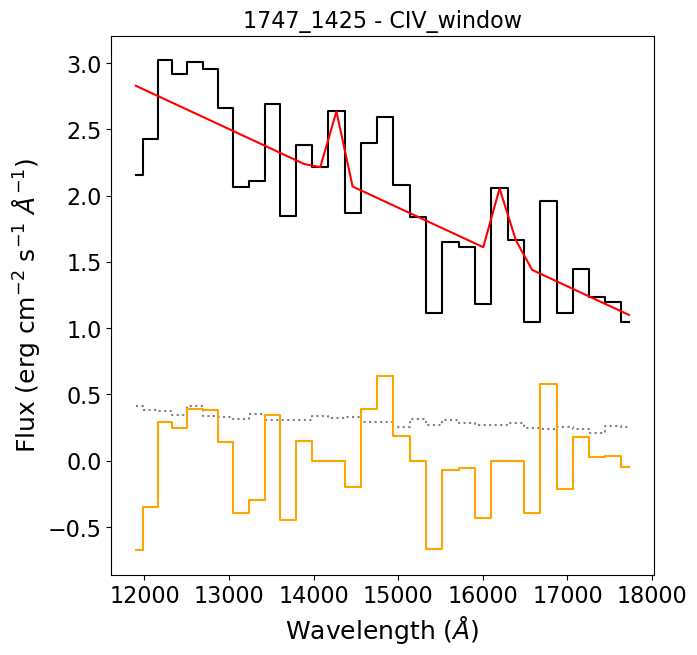

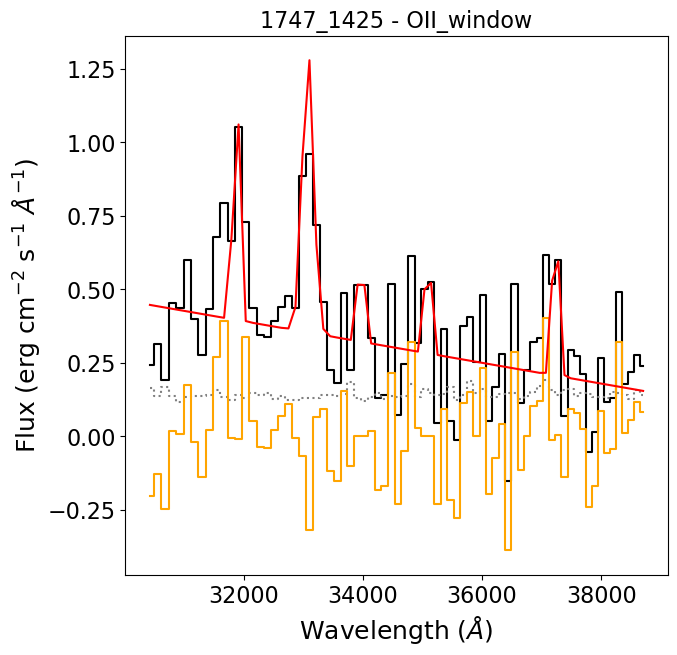

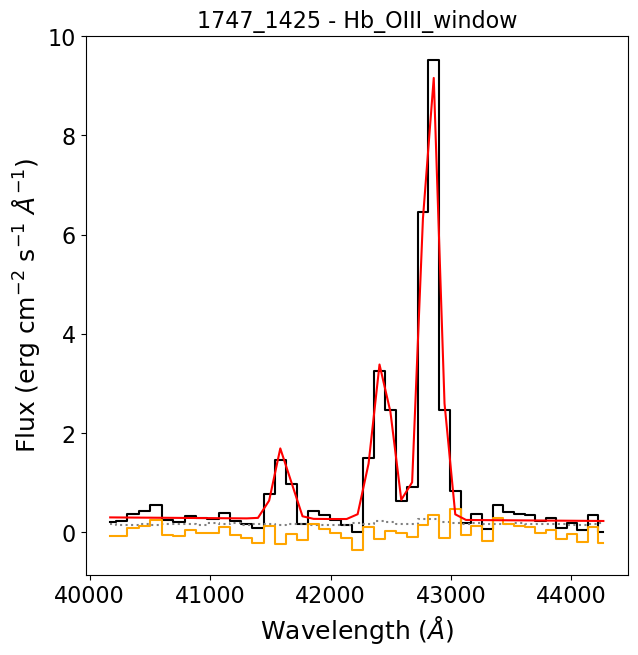

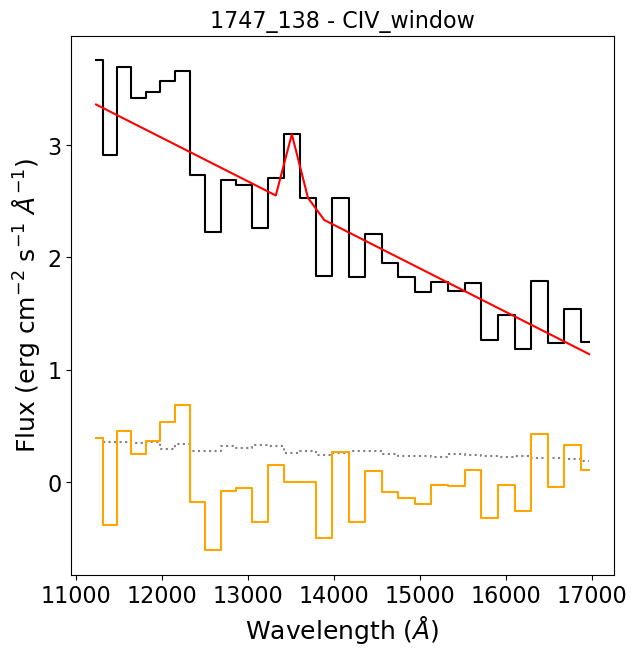

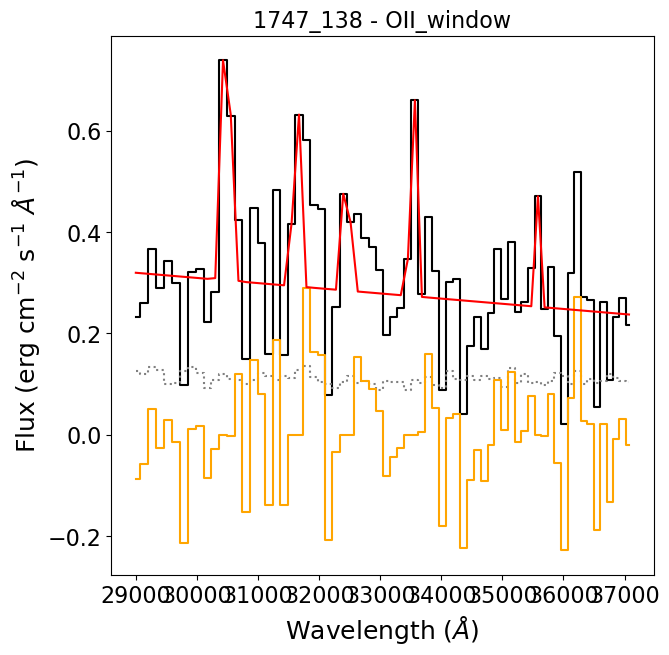

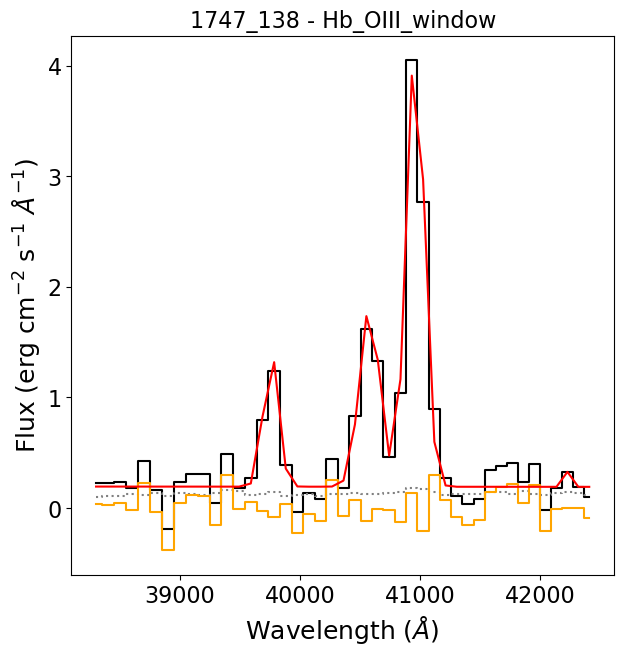

In [14]:
for idx, gal in enumerate(borg_ids):
    itab = np.where(tab['msaid'] == gal)[0]
    z = tab['z'][itab][0]
    print(gal, z)
    print(data_spec[gal]['prism-clear'])

    wavelength = data_spec[gal]['prism-clear']['lam']*1e4 #converting to \AA    
    flux_nu = data_spec[gal]['prism-clear']['flux'] #f_nu 
    # print(flux_nu)
    flux_nu_err = data_spec[gal]['prism-clear']['err']

    flux_l = convert_fnu_to_flambda(wavelength, flux_nu) * 1.e20  # convert units to 1e-20 in cgs.
    # print(flux_l/1e20)    
    flux_l_err = convert_fnu_to_flambda(wavelength, flux_nu_err) * 1.e20

    # select indices in wavelength array that correspond to our selected wavelength range
    redshift_lines = {key: value * (z + 1) for key, value in lines.items()}
    spectral_windows = {
        'CIV_window': [redshift_lines['CIV_doublet'] - 1500, redshift_lines['CIII]_doublet'] + 1500],
        'OII_window': [redshift_lines['[OII]_doublet'] - 1500, redshift_lines['Hgammma_OIII'] + 1500],
        'Hb_OIII_window': [redshift_lines['Hbeta'] - 1500, redshift_lines['[OIII]_5007'] + 1500]
    }

    # Begin bootstrap sampling:
    N = 100
    bootstrap_results = {
        'continuum_slope': [],
        'continuum_intercept': [],
        'line_fluxes': [],  # List of dictionaries, one per iteration
        'flux_ratios': [],  # List of dictionaries, one per iteration
        'amplitudes': [],   # Add amplitudes to the dictionary
        'widths': []        # Add widths to the dictionary
    }   

    
     # **Compute Errors from Bootstrap Samples**
    final_results = {}  # Reset for each galaxy!
    count=0
    for _ in range(N):  # loop over the noise and then get the windows, and at every iteration compute the line fluxes and ratios
        count+=1
        # Generate new spectrum by adding Gaussian noise
        flux_new = flux_l + np.random.normal(0, flux_l_err)

        # Dictionary to store this iteration's line fluxes
        iteration_fluxes = {}
        iteration_ratios = {}
        iteration_amplitudes = {}
        iteration_widths = {}

        for window_name, window_range in spectral_windows.items():
            sliced_index = np.where((wavelength >= window_range[0]) & (wavelength <= window_range[1]))
            window_wavelength = wavelength[sliced_index]
            window_flux = flux_l[sliced_index]
            window_flux_err = flux_l_err[sliced_index]
            invalid_spec = np.where((np.isfinite(window_flux) == False) | (np.isfinite(window_flux_err) == False))
            window_flux[invalid_spec] = 0.
            window_flux_err[invalid_spec] = 1.e20
     
            model = models.Polynomial1D(1)
            Nlines = 0

            for key in redshift_lines:
                lam = redshift_lines[key]
                if (lam < np.nanmin(window_wavelength)) | (lam > np.nanmax(window_wavelength)):
                    continue

                line = models.Gaussian1D(amplitude=np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))]),
                                         mean=lam, stddev=60)
                line.amplitude.min = 0.  # 1.e-3
                line.amplitude.max = np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))])
                line.amplitude.fixed = False
                line.stddev.min = 0.  # 1.e-3
                line.stddev.fixed = False
                model += line
                Nlines += 1

            # Fit model:
            fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
            g = fit_g(model, window_wavelength, flux_new[sliced_index], weights=1 / window_flux_err)
            # Check fit status using fit_info
            status = fit_g.fit_info.get('status')

           
            # Store bootstrapped parameters for this iteration
            bootstrap_results['continuum_slope'].append(g.parameters[0])  # Use g.parameters[0] for the slope (c0)
            bootstrap_results['continuum_intercept'].append(g.parameters[1])  # Use g.parameters[1] for the intercept (c1)


            #for line_name, lam in redshift_lines.items():
            for i, line_name in enumerate([key for key in redshift_lines if redshift_lines[key] >= np.nanmin(window_wavelength) and redshift_lines[key] <= np.nanmax(window_wavelength)]):

                #print(line_name)
                amp = getattr(g, f'amplitude_{i+1}').value
                width = getattr(g, f'stddev_{i+1}').value

                # Store in dictionaries for later error calculation
                if line_name not in iteration_amplitudes:
                    iteration_amplitudes[line_name] = []
                    iteration_widths[line_name] = []

                iteration_amplitudes[line_name].append(amp)
                iteration_widths[line_name].append(width)

                # **Compute line flux**
                flux = amp * width * np.sqrt(2 * np.pi)
                iteration_fluxes[f"{line_name}_flux"] = flux
            # print(count) #correctly goes throush the 3 spectral windows and finds fluxes for all lines, this for 100 times


        # **Compute flux ratios**
        # print(iteration_fluxes) #Fluxes saved correctly! No overwritting
        if '[NeIII]_flux' in iteration_fluxes and '[OII]_doublet_flux' in iteration_fluxes:
            iteration_ratios['NeIII_OII_ratio'] = iteration_fluxes['[NeIII]_flux'] / iteration_fluxes['[OII]_doublet_flux']

        if '[OIII]_5007_flux' in iteration_fluxes and 'Hbeta_flux' in iteration_fluxes:
            iteration_ratios['OIII5007_Hbeta_ratio'] = iteration_fluxes['[OIII]_5007_flux'] / iteration_fluxes['Hbeta_flux']

        if 'Hdelta_flux' in iteration_fluxes and 'Hbeta_flux' in iteration_fluxes:
            iteration_ratios['Hdelta_Hbeta_ratio'] = iteration_fluxes['Hdelta_flux'] / iteration_fluxes['Hbeta_flux']

        if 'Hgammma_OIII_flux' in iteration_fluxes and 'Hbeta_flux' in iteration_fluxes:
            iteration_ratios['Hgamma_Hbeta_ratio'] = iteration_fluxes['Hgammma_OIII_flux'] / iteration_fluxes['Hbeta_flux']



        # Debugging: Print ratios for each iteration
        #print(f"Iteration {count} flux ratios: {iteration_ratios}") This worked!

        # Store this bootstrap iteration's results
        bootstrap_results['line_fluxes'].append(iteration_fluxes)
        bootstrap_results['flux_ratios'].append(iteration_ratios)
        bootstrap_results['amplitudes'].append(iteration_amplitudes)
        bootstrap_results['widths'].append(iteration_widths)

    # Now that all bootstrap iterations are done, plot and save the fit for each spectral window
    for window_name, window_range in spectral_windows.items():
        sliced_index = np.where((wavelength >= window_range[0]) & (wavelength <= window_range[1]))
        window_wavelength = wavelength[sliced_index]
        window_flux = flux_l[sliced_index]
        window_flux_err = flux_l_err[sliced_index]

        # Define the model and fit it
        model = models.Polynomial1D(1)
        Nlines = 0

        for key in redshift_lines:
            lam = redshift_lines[key]
            if (lam < np.nanmin(window_wavelength)) | (lam > np.nanmax(window_wavelength)):
                continue

            line = models.Gaussian1D(
                amplitude=np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))]),
                mean=lam, stddev=60
            )
            line.amplitude.min = 0.
            line.amplitude.max = np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))])
            model += line
            Nlines += 1

        # Fit the model to the spectrum
        fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
        g = fit_g(model, window_wavelength, window_flux, weights=1 / window_flux_err, maxiter=10000, estimate_jacobian=True)

        #############################################################################################################
        #Add Fit Diagnostics (Metric to see which galaxies fit poorly) 
        #Compute RMSE of residual, coming from subtracting observed flux in specific wavelength from the
        #fit function to the data in that same wavelength window 
        residuals = window_flux - g(window_wavelength)
        
        rms = np.sqrt(np.mean(residuals**2)) 
        print(f"RMS for {gal} in {window_name}: {rms:.4g}")
        final_results[f"{window_name}_fit_rms"] = rms
        
        
        #############################################################################################################
        # Plot and save the fit for each spectral window
        fig = plt.figure(figsize=(7, 7))
        plt.title(gal + " - " + window_name, fontsize=16)
        plt.step(window_wavelength, window_flux, where='mid', color='k', label='Data')  # Original data
        plt.step(window_wavelength, window_flux_err, where='mid', color='grey', linestyle='dotted', label='Error')  # Error bars
        residuals = window_flux - g(window_wavelength)  # Residuals
        plt.step(window_wavelength, residuals, where='mid', color='orange', label='Residuals')  # Residuals
        plt.plot(window_wavelength, g(window_wavelength), color='red', label='Fit')  # Model fit

        plt.xlabel(r"Wavelength ($\AA$)", fontsize=18)
        plt.ylabel(r"Flux (erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$)", fontsize=18)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

        # Save the plot as a PNG (or any other format)
        plot_filename = f"Figures_spectra/fit_{gal}_{window_name}.png"
        plt.savefig(plot_filename)  # Save the figure with a unique filename based on the window name

        #plt.close()  # Close the plot after saving

    # **Find all emission lines across bootstraps**
    all_detected_lines = set()
    for iteration in bootstrap_results['line_fluxes']:
        all_detected_lines.update(iteration.keys())  # Collect all line_flux keys

    # **Compute errors for all detected lines**
    for line in all_detected_lines:
        flux_values = [iteration[line] for iteration in bootstrap_results['line_fluxes'] if line in iteration]
        if len(flux_values) > 0:  # Ensure at least one detection
            flux_16, flux_median, flux_84 = np.percentile(flux_values, [16, 50, 84])
            final_results[line] = flux_median
            final_results[f"{line}_err"] = np.array([flux_median - flux_16, flux_84 - flux_median])  # Asymmetric errors

   
    # **Compute errors for flux ratios**
    for ratio in ['NeIII_OII_ratio', 'OIII5007_Hbeta_ratio','Hdelta_Hbeta_ratio','Hgamma_Hbeta_ratio']:
        ratio_values = [iteration[ratio] for iteration in bootstrap_results['flux_ratios'] if ratio in iteration]
        if len(ratio_values) > 0:
            ratio_16, ratio_median, ratio_84 = np.percentile(ratio_values, [16, 50, 84])
            final_results[ratio] = ratio_median
            final_results[f"{ratio}_err"] = np.array([ratio_median - ratio_16, ratio_84 - ratio_median])  

    # Append results **per galaxy**
    all_fit_results.append({gal: final_results})
    print(f"Final results for {gal}:", final_results.keys())

In [15]:
print("Final results before saving:", final_results.keys())

Final results before saving: dict_keys(['CIV_window_fit_rms', 'OII_window_fit_rms', 'Hb_OIII_window_fit_rms', '[OIII]_4959_flux', '[OIII]_4959_flux_err', 'Hgammma_OIII_flux', 'Hgammma_OIII_flux_err', '[NeIII]_flux', '[NeIII]_flux_err', 'Hepsilon_flux', 'Hepsilon_flux_err', 'Hbeta_flux', 'Hbeta_flux_err', 'MgI_5174_flux', 'MgI_5174_flux_err', 'Hdelta_flux', 'Hdelta_flux_err', 'CIV_doublet_flux', 'CIV_doublet_flux_err', '[OIII]_5007_flux', '[OIII]_5007_flux_err', 'CIII]_doublet_flux', 'CIII]_doublet_flux_err', 'OIII]_doublet_flux', 'OIII]_doublet_flux_err', '[OII]_doublet_flux', '[OII]_doublet_flux_err', 'NeIII_OII_ratio', 'NeIII_OII_ratio_err', 'OIII5007_Hbeta_ratio', 'OIII5007_Hbeta_ratio_err', 'Hdelta_Hbeta_ratio', 'Hdelta_Hbeta_ratio_err', 'Hgamma_Hbeta_ratio', 'Hgamma_Hbeta_ratio_err'])


In [16]:
# Save fit results
with open('fit_results_ratios.pkl', 'wb') as f:
    pickle.dump(all_fit_results, f)

In [17]:
# Load the data into a vaiable 
with open('C:/Users/isaia/UCLA REU 2025 Summer/fit_results_ratios.pkl', 'rb') as f:
    BoRG_survey_results = pickle.load(f)

In [18]:
galaxy_ids = []
for i in range(len(BoRG_survey_results)):
    galaxy_ids.append(list(BoRG_survey_results[i].keys()))

In [19]:
len(galaxy_ids)

14

## Putting BoRG Survey into a df

In [20]:
def grab_data(galaxy, data):
    g_id = list(galaxy.keys())[0] 
    return galaxy[g_id].get(data, np.nan)

In [21]:
data_dict = {key: [] for key in final_results.keys()}
for galaxy in BoRG_survey_results: 
    for key in data_dict:
        data_dict[key].append(grab_data(galaxy, key))


In [22]:
## General Algorithm For acessing data within a galaxy. 
#Step 1: Get dictionary of desired galaxy 
first_gal = BoRG_survey_results[0] 

#Step 2: Get the internal ID
gal_id = list(first_gal.keys())[0]

#Step 3: Access the nested flux 
hdelta_flux = first_gal[gal_id]['Hdelta_flux']

print(hdelta_flux)

86.33175375879391


In [23]:
for key in data_dict: 
    print(f"{key}: {len(data_dict[key])}")

CIV_window_fit_rms: 14
OII_window_fit_rms: 14
Hb_OIII_window_fit_rms: 14
[OIII]_4959_flux: 14
[OIII]_4959_flux_err: 14
Hgammma_OIII_flux: 14
Hgammma_OIII_flux_err: 14
[NeIII]_flux: 14
[NeIII]_flux_err: 14
Hepsilon_flux: 14
Hepsilon_flux_err: 14
Hbeta_flux: 14
Hbeta_flux_err: 14
MgI_5174_flux: 14
MgI_5174_flux_err: 14
Hdelta_flux: 14
Hdelta_flux_err: 14
CIV_doublet_flux: 14
CIV_doublet_flux_err: 14
[OIII]_5007_flux: 14
[OIII]_5007_flux_err: 14
CIII]_doublet_flux: 14
CIII]_doublet_flux_err: 14
OIII]_doublet_flux: 14
OIII]_doublet_flux_err: 14
[OII]_doublet_flux: 14
[OII]_doublet_flux_err: 14
NeIII_OII_ratio: 14
NeIII_OII_ratio_err: 14
OIII5007_Hbeta_ratio: 14
OIII5007_Hbeta_ratio_err: 14
Hdelta_Hbeta_ratio: 14
Hdelta_Hbeta_ratio_err: 14
Hgamma_Hbeta_ratio: 14
Hgamma_Hbeta_ratio_err: 14


In [24]:
# Save to dataframe
BoRG_df = pd.DataFrame(data_dict)

In [25]:
BoRG_df.columns

Index(['CIV_window_fit_rms', 'OII_window_fit_rms', 'Hb_OIII_window_fit_rms',
       '[OIII]_4959_flux', '[OIII]_4959_flux_err', 'Hgammma_OIII_flux',
       'Hgammma_OIII_flux_err', '[NeIII]_flux', '[NeIII]_flux_err',
       'Hepsilon_flux', 'Hepsilon_flux_err', 'Hbeta_flux', 'Hbeta_flux_err',
       'MgI_5174_flux', 'MgI_5174_flux_err', 'Hdelta_flux', 'Hdelta_flux_err',
       'CIV_doublet_flux', 'CIV_doublet_flux_err', '[OIII]_5007_flux',
       '[OIII]_5007_flux_err', 'CIII]_doublet_flux', 'CIII]_doublet_flux_err',
       'OIII]_doublet_flux', 'OIII]_doublet_flux_err', '[OII]_doublet_flux',
       '[OII]_doublet_flux_err', 'NeIII_OII_ratio', 'NeIII_OII_ratio_err',
       'OIII5007_Hbeta_ratio', 'OIII5007_Hbeta_ratio_err',
       'Hdelta_Hbeta_ratio', 'Hdelta_Hbeta_ratio_err', 'Hgamma_Hbeta_ratio',
       'Hgamma_Hbeta_ratio_err'],
      dtype='object')

In [26]:
BoRG_survey_results

[{'2426_112': {'CIV_window_fit_rms': 0.43263929244757365,
   'OII_window_fit_rms': 0.18538349317049463,
   'Hb_OIII_window_fit_rms': 0.16063147224475532,
   'CIII]_doublet_flux': 498.1763490408937,
   'CIII]_doublet_flux_err': array([76.46584995, 50.62080738]),
   '[OIII]_4959_flux': 656.8079280761126,
   '[OIII]_4959_flux_err': array([73.85980754, 58.96988119]),
   'Hepsilon_flux': 193.70333100540003,
   'Hepsilon_flux_err': array([58.46853734, 64.33710821]),
   'Hbeta_flux': 316.95016411253,
   'Hbeta_flux_err': array([60.52882171, 35.11901513]),
   '[OIII]_5007_flux': 1978.4917368573647,
   '[OIII]_5007_flux_err': array([101.0898741 ,  78.50960075]),
   '[NeIII]_flux': 357.45901513713784,
   '[NeIII]_flux_err': array([142.66937807,  78.32303586]),
   'MgI_5174_flux': 0.0,
   'MgI_5174_flux_err': array([ 0.        , 31.65322719]),
   '[OII]_doublet_flux': 137.59618455238615,
   '[OII]_doublet_flux_err': array([22.35448429, 73.81542794]),
   'CIV_doublet_flux': 289.55460246617054,
   

In [27]:
BoRG_df['Galaxy ID'] = galaxy_ids

In [28]:
# Move the column 
move_this = BoRG_df.pop('Galaxy ID')
BoRG_df.insert(0, 'Galaxy ID', move_this)

In [29]:
BoRG_df.to_csv("borg_df.csv", index = False) 

In [34]:
BoRG_df[['Galaxy ID', '[OIII]_5007_flux', '[OIII]_5007_flux']]

,Galaxy ID,[OIII]_5007_flux,[OIII]_5007_flux
0,[2426_112],1978.491737,1978.491737
1,[2426_1736],1406.675879,1406.675879
2,[2426_1130],558.661421,558.661421
3,[2426_1777],1284.875934,1284.875934
4,[2426_169],6603.195761,6603.195761
5,[2426_1690],1321.288070,1321.288070
6,[2426_1655],2772.531538,2772.531538
7,[1747_199],1107.597242,1107.597242
8,[1747_732],1089.977251,1089.977251
9,[1747_902],1688.754819,1688.754819


## Plot Spectra of bad fit galaxies

In [26]:
bad_fits_df = BoRG_df.sort_values('CIV_window_fit_rms', ascending = False).head(5)

poor_fit_galaxies = bad_fits_df['Galaxy ID'].str[0].tolist()
poor_fit_galaxies

['2426_169', '2426_1690', '2426_1736', '2426_112', '2426_1655']

In [27]:
def plot_spectrum(gal, redshift, window_name=None, redshift_lines=None):
    spec = data_spec[gal]['prism-clear']
    wavelength = spec['lam'] * 1e4  # μm to Å
    flux = spec['flux'] * 1e20
    flux_err = spec['err'] * 1e20

    # Define which emission lines each window covers
    window_map = {
        'CIV_window': ('CIV_doublet', 'CIII]_doublet'),
        'OII_window': ('[OII]_doublet', 'Hgammma_OIII'),
        'Hb_OIII_window': ('Hbeta', '[OIII]_5007'),
    }

    if window_name and redshift_lines and window_name in window_map:
        line1, line2 = window_map[window_name]
        lam1 = redshift_lines[line1] * (1 + redshift) - 1500
        lam2 = redshift_lines[line2] * (1 + redshift) + 1500
        mask = (wavelength >= lam1) & (wavelength <= lam2)
    else:
        mask = np.isfinite(wavelength)

    plt.figure(figsize=(10, 6))
    plt.title(f"Spectrum for {gal} - {window_name if window_name else 'Full'}")
    plt.plot(wavelength[mask], flux[mask], label='Flux', color='black')
    plt.fill_between(wavelength[mask],
                     flux[mask] - flux_err[mask],
                     flux[mask] + flux_err[mask],
                     color='gray', alpha=0.5, label='Error')

    # Overlay vertical lines at redshifted line centers
    if redshift_lines:
        for line, lam in redshift_lines.items():
            lam_obs = lam * (1 + redshift)
            if lam1 <= lam_obs <= lam2:
                plt.axvline(lam_obs, color='blue', linestyle='--', alpha=0.5)
                plt.text(lam_obs, max(flux[mask]) * 0.95, line, rotation=90,
                         fontsize=9, ha='center', va='top', color='blue')

    plt.xlabel("Wavelength (Å)")
    plt.ylabel("Flux (10⁻²⁰ erg cm⁻² s⁻¹ Å⁻¹)")
    plt.legend()
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()


### Spectrum for CIV Bad Fit Galaxies (CIV doublet to CIII doublet) 

In [ ]:
for gal in poor_fit_galaxies: 
    idx = np.where(tab['msaid'] == gal)[0][0]
    z = tab['z'][idx]
    plot_spectrum(gal, z, window_name = 'CIV_window', redshift_lines = lines)

### Spectrum for H_Beta_OIII Bad Fit Galaxies (H_beta to [OIII] lambda 5007) 

In [ ]:
for gal in poor_fit_galaxies: 
    idx = np.where(tab['msaid'] == gal)[0][0]
    z = tab['z'][idx]
    plot_spectrum(gal, z, window_name = 'OII_window', redshift_lines = lines)

### Spectrum for OII Bad Fit Galaxies (OII doublet to [OIII]/H_gamma) 

In [ ]:
for gal in poor_fit_galaxies: 
    idx = np.where(tab['msaid'] == gal)[0][0]
    z = tab['z'][idx]
    plot_spectrum(gal, z, window_name = 'Hb_OIII_window', redshift_lines = lines)

# Test Data Pipeline

In [31]:
file_spec = 'C:/Users/isaia/UCLA REU 2025 Summer/spectra_13Dec2024_full.p'
with open(file_spec, 'rb') as file:
    data_spec = pickle.load(file)

In [32]:
#The hierarchy is:
#Top level keys: galaxy IDs (e.g., '2426_112')
#Second level: instruments or bands (e.g., 'prism-clear')
#Third level: data fields (e.g., 'lam', 'flux', 'err')


data_spec
len(data_spec)

1362

In [33]:
first = list(data_spec.keys())[0]

first_instruments = data_spec[first]
first_instruments_keys = first_instruments.keys()
first_instruments_keys

dict_keys(['g140m-f070lp', 'g235m-f170lp', 'g395m-f290lp', 'prism-clear'])

In [34]:
data_spec[list(data_spec.keys())[0]].keys()

dict_keys(['g140m-f070lp', 'g235m-f170lp', 'g395m-f290lp', 'prism-clear'])

## Data Extraction (Test Data)

In [35]:
test_data_ids = list(data_spec.keys())

In [36]:
len(test_data_ids)

1362

#### Nan Value Investigation

In [ ]:
data_spec

In [84]:
Bad_galaxies = []
for gal_id in data_spec:
    gal = data_spec[gal_id]
    try:
        flux = np.array(data_spec[gal_id]['prism-clear']['flux'])
        if (
            flux is None or
            flux.size == 0 or
            not np.isfinite(np.nanmax(flux)) or
            (np.isnan(flux).sum() / flux.size) > 0.3
        ):
            Bad_galaxies.append(gal_id)
    except KeyError: 
        #If flux/instrument is malformed or missing entirely
        Bad_galaxies.append(gal_id) 

print(len(Bad_galaxies))

101


In [7]:
all_fit_results = []
for idx, gal in enumerate(test_data_ids):
    try:
        itab = np.where(tab['msaid'] == gal)[0]
        z = tab['z'][itab][0]
        print(gal, z)
        print(data_spec[gal]['prism-clear'])
    
        wavelength = data_spec[gal]['prism-clear']['lam']*1e4 #converting to \AA    
        flux_nu = data_spec[gal]['prism-clear']['flux'] #f_nu 
        # print(flux_nu)
        flux_nu_err = data_spec[gal]['prism-clear']['err']
    
        flux_l = convert_fnu_to_flambda(wavelength, flux_nu) * 1.e20  # convert units to 1e-20 in cgs.
        # print(flux_l/1e20)
        
        flux_l_err = convert_fnu_to_flambda(wavelength, flux_nu_err) * 1.e20
    
        # select indices in wavelength array that correspond to our selected wavelength range
        redshift_lines = {key: value * (z + 1) for key, value in lines.items()}
        spectral_windows = {
            'CIV_window': [redshift_lines['CIV_doublet'] - 1500, redshift_lines['CIII]_doublet'] + 1500],
            'OII_window': [redshift_lines['[OII]_doublet'] - 1500, redshift_lines['Hgammma_OIII'] + 1500],
            'Hb_OIII_window': [redshift_lines['Hbeta'] - 1500, redshift_lines['[OIII]_5007'] + 1500]
        }
    
        # Begin bootstrap sampling:
        N = 100
        bootstrap_results = {
            'continuum_slope': [],
            'continuum_intercept': [],
            'line_fluxes': [],  # List of dictionaries, one per iteration
            'flux_ratios': [],  # List of dictionaries, one per iteration
            'amplitudes': [],   # Add amplitudes to the dictionary
            'widths': []        # Add widths to the dictionary
        } 
         # **Compute Errors from Bootstrap Samples**
        final_results = {}  # Reset for each galaxy!
        count=0
        for _ in range(N):  # loop over the noise and then get the windows, and at every iteration compute the line fluxes and ratios
            count+=1
            # Generate new spectrum by adding Gaussian noise
            flux_new = flux_l + np.random.normal(0, flux_l_err)
    
            # Dictionary to store this iteration's line fluxes
            iteration_fluxes = {}
            iteration_ratios = {}
            iteration_amplitudes = {}
            iteration_widths = {}
    
            for window_name, window_range in spectral_windows.items():
                sliced_index = np.where((wavelength >= window_range[0]) & (wavelength <= window_range[1]))
                window_wavelength = wavelength[sliced_index]
                window_flux = flux_l[sliced_index]
                window_flux_err = flux_l_err[sliced_index]
                invalid_spec = np.where((np.isfinite(window_flux) == False) | (np.isfinite(window_flux_err) == False))
                window_flux[invalid_spec] = 0.
                window_flux_err[invalid_spec] = 1.e20
         
                model = models.Polynomial1D(1)
                Nlines = 0
    
                for key in redshift_lines:
                    lam = redshift_lines[key]
                    if len(window_wavelength) == 0 or np.all(np.isnan(window_wavelength)):
                        continue  # Skip this line fit if no usable data
                    if (lam < np.nanmin(window_wavelength)) | (lam > np.nanmax(window_wavelength)):
                        continue
    
                    line = models.Gaussian1D(amplitude=np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))]),
                                             mean=lam, stddev=60)
                    line.amplitude.min = 0.  # 1.e-3
                    line.amplitude.max = np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))])
                    line.amplitude.fixed = False
                    line.stddev.min = 0.  # 1.e-3
                    line.stddev.fixed = False
                    model += line
                    Nlines += 1
    
                # Fit model:
                fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
                g = fit_g(model, window_wavelength, flux_new[sliced_index], weights=1 / window_flux_err)
                # Check fit status using fit_info
                status = fit_g.fit_info.get('status')
    
               
                # Store bootstrapped parameters for this iteration
                bootstrap_results['continuum_slope'].append(g.parameters[0])  # Use g.parameters[0] for the slope (c0)
                bootstrap_results['continuum_intercept'].append(g.parameters[1])  # Use g.parameters[1] for the intercept (c1)
    
    
                #for line_name, lam in redshift_lines.items():
                for i, line_name in enumerate([key for key in redshift_lines if redshift_lines[key] >= np.nanmin(window_wavelength) and redshift_lines[key] <= np.nanmax(window_wavelength)]):
    
                    #print(line_name)
                    amp = getattr(g, f'amplitude_{i+1}').value
                    width = getattr(g, f'stddev_{i+1}').value
    
                    # Store in dictionaries for later error calculation
                    if line_name not in iteration_amplitudes:
                        iteration_amplitudes[line_name] = []
                        iteration_widths[line_name] = []
    
                    iteration_amplitudes[line_name].append(amp)
                    iteration_widths[line_name].append(width)
    
                    # **Compute line flux**
                    flux = amp * width * np.sqrt(2 * np.pi)
                    iteration_fluxes[f"{line_name}_flux"] = flux
                # print(count) #correctly goes throush the 3 spectral windows and finds fluxes for all lines, this for 100 times
    
    
            # **Compute flux ratios**
            # print(iteration_fluxes) #Fluxes saved correctly! No overwritting
            if '[NeIII]_flux' in iteration_fluxes and '[OII]_doublet_flux' in iteration_fluxes:
                iteration_ratios['NeIII_OII_ratio'] = iteration_fluxes['[NeIII]_flux'] / iteration_fluxes['[OII]_doublet_flux']
    
            if '[OIII]_5007_flux' in iteration_fluxes and 'Hbeta_flux' in iteration_fluxes:
                iteration_ratios['OIII5007_Hbeta_ratio'] = iteration_fluxes['[OIII]_5007_flux'] / iteration_fluxes['Hbeta_flux']
    
            if 'Hdelta_flux' in iteration_fluxes and 'Hbeta_flux' in iteration_fluxes:
                iteration_ratios['Hdelta_Hbeta_ratio'] = iteration_fluxes['Hdelta_flux'] / iteration_fluxes['Hbeta_flux']
    
            if 'Hgammma_OIII_flux' in iteration_fluxes and 'Hbeta_flux' in iteration_fluxes:
                iteration_ratios['Hgamma_Hbeta_ratio'] = iteration_fluxes['Hgammma_OIII_flux'] / iteration_fluxes['Hbeta_flux']
    
    
    
            # Debugging: Print ratios for each iteration
            #print(f"Iteration {count} flux ratios: {iteration_ratios}") This worked!
    
            # Store this bootstrap iteration's results
            bootstrap_results['line_fluxes'].append(iteration_fluxes)
            bootstrap_results['flux_ratios'].append(iteration_ratios)
            bootstrap_results['amplitudes'].append(iteration_amplitudes)
            bootstrap_results['widths'].append(iteration_widths)
    
        # Now that all bootstrap iterations are done, plot and save the fit for each spectral window
        for window_name, window_range in spectral_windows.items():
            sliced_index = np.where((wavelength >= window_range[0]) & (wavelength <= window_range[1]))
            window_wavelength = wavelength[sliced_index]
            window_flux = flux_l[sliced_index]
            window_flux_err = flux_l_err[sliced_index]
    
            # Define the model and fit it
            model = models.Polynomial1D(1)
            Nlines = 0
    
            for key in redshift_lines:
                lam = redshift_lines[key]
                if (lam < np.nanmin(window_wavelength)) | (lam > np.nanmax(window_wavelength)):
                    continue
    
                line = models.Gaussian1D(
                    amplitude=np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))]),
                    mean=lam, stddev=60
                )
                line.amplitude.min = 0.
                line.amplitude.max = np.nanmax(window_flux[(window_wavelength > (lam - 100.)) & (window_wavelength < (lam + 100.))])
                model += line
                Nlines += 1
    
            # Fit the model to the spectrum
            fit_g = fitting.LevMarLSQFitter(calc_uncertainties=True)
            g = fit_g(model, window_wavelength, window_flux, weights=1 / window_flux_err, maxiter=10000, estimate_jacobian=True)

            #############################################################################################################
            #Add Fit Diagnostics (Metric to see which galaxies fit poorly) 
            #Compute RMSE of residual, coming from subtracting observed flux in specific wavelength from the
            #fit function to the data in that same wavelength window 
            residuals = window_flux - g(window_wavelength)
                    
            rms = np.sqrt(np.mean(residuals**2)) 
            print(f"RMS for {gal} in {window_name}: {rms:.4g}")
            final_results[f"{window_name}_fit_rms"] = rms
        
        
            #############################################################################################################

            
            # Plot and save the fit for each spectral window
            fig = plt.figure(figsize=(7, 7))
            plt.title(gal + " - " + window_name, fontsize=16)
            plt.step(window_wavelength, window_flux, where='mid', color='k', label='Data')  # Original data
            plt.step(window_wavelength, window_flux_err, where='mid', color='grey', linestyle='dotted', label='Error')  # Error bars
            residuals = window_flux - g(window_wavelength)  # Residuals
            plt.step(window_wavelength, residuals, where='mid', color='orange', label='Residuals')  # Residuals
            plt.plot(window_wavelength, g(window_wavelength), color='red', label='Fit')  # Model fit
    
            plt.xlabel(r"Wavelength ($\AA$)", fontsize=18)
            plt.ylabel(r"Flux (erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$)", fontsize=18)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    
            # Save the plot as a PNG (or any other format)
            plot_filename = f"Figures_spectra/fit_{gal}_{window_name}.png"
            os.makedirs(os.path.dirname(plot_filename), exist_ok=True)  # Create folder if missing
            plt.savefig(plot_filename)  # Save the figure with a unique filename based on the window name
    
            plt.close()  # Close the plot after saving
    
       
    
        # **Find all emission lines across bootstraps**
        all_detected_lines = set()
        for iteration in bootstrap_results['line_fluxes']:
            all_detected_lines.update(iteration.keys())  # Collect all line_flux keys
    
        # **Compute errors for all detected lines**
        for line in all_detected_lines:
            flux_values = [iteration[line] for iteration in bootstrap_results['line_fluxes'] if line in iteration]
            if len(flux_values) > 0:  # Ensure at least one detection
                flux_16, flux_median, flux_84 = np.percentile(flux_values, [16, 50, 84])
                final_results[line] = flux_median
                final_results[f"{line}_err"] = np.array([flux_median - flux_16, flux_84 - flux_median])  # Asymmetric errors
    
       
        # **Compute errors for flux ratios**
        for ratio in ['NeIII_OII_ratio', 'OIII5007_Hbeta_ratio','Hdelta_Hbeta_ratio','Hgamma_Hbeta_ratio']:
            ratio_values = [iteration[ratio] for iteration in bootstrap_results['flux_ratios'] if ratio in iteration]
            if len(ratio_values) > 0:
                ratio_16, ratio_median, ratio_84 = np.percentile(ratio_values, [16, 50, 84])
                final_results[ratio] = ratio_median
                final_results[f"{ratio}_err"] = np.array([ratio_median - ratio_16, ratio_84 - ratio_median])  
    
        # Append results **per galaxy**
        all_fit_results.append({gal: final_results})
    except Exception as e:
        print(f"Failed on{gal} due to: {e}")
    print(f"Final results for {gal}:", final_results.keys())

NameError: name 'test_data_ids' is not defined

In [138]:
print("Final results before saving:", final_results.keys())

Final results before saving: dict_keys(['Hdelta_flux', 'Hdelta_flux_err', 'CIII]_doublet_flux', 'CIII]_doublet_flux_err', 'Hbeta_flux', 'Hbeta_flux_err', '[OIII]_5007_flux', '[OIII]_5007_flux_err', 'OIII]_doublet_flux', 'OIII]_doublet_flux_err', '[OII]_doublet_flux', '[OII]_doublet_flux_err', 'Hepsilon_flux', 'Hepsilon_flux_err', '[OIII]_4959_flux', '[OIII]_4959_flux_err', '[NeIII]_flux', '[NeIII]_flux_err', 'Hgammma_OIII_flux', 'Hgammma_OIII_flux_err', 'CIV_doublet_flux', 'CIV_doublet_flux_err', 'NeIII_OII_ratio', 'NeIII_OII_ratio_err', 'OIII5007_Hbeta_ratio', 'OIII5007_Hbeta_ratio_err', 'Hdelta_Hbeta_ratio', 'Hdelta_Hbeta_ratio_err', 'Hgamma_Hbeta_ratio', 'Hgamma_Hbeta_ratio_err'])


In [139]:
# Save fit results
with open('test_data_fit_results_ratios.pkl', 'wb') as f:
    pickle.dump(all_fit_results, f)

In [144]:
# Load the data into a vaiable 
with open('C:/Users/isaia/UCLA REU 2025 Summer/test_data_fit_results_ratios.pkl', 'rb') as f:
    test_data_survey_results = pickle.load(f)

In [147]:
len(test_data_survey_results)

1180

In [148]:
dictionary = {key: [] for key in final_results.keys()} 
for galaxy in test_data_survey_results:
    g_id = list(galaxy.keys())[0]
    for key in dictionary: 
        value = galaxy[g_id].get(key, np.nan) 
        dictionary[key].append(grab_data(galaxy,key))


In [149]:
#Verify the lengths of each feature matches the number of galaxies
for key in dictionary:
    print(f"{key}:{len(dictionary[key])}")

Hdelta_flux:1180
Hdelta_flux_err:1180
CIII]_doublet_flux:1180
CIII]_doublet_flux_err:1180
Hbeta_flux:1180
Hbeta_flux_err:1180
[OIII]_5007_flux:1180
[OIII]_5007_flux_err:1180
OIII]_doublet_flux:1180
OIII]_doublet_flux_err:1180
[OII]_doublet_flux:1180
[OII]_doublet_flux_err:1180
Hepsilon_flux:1180
Hepsilon_flux_err:1180
[OIII]_4959_flux:1180
[OIII]_4959_flux_err:1180
[NeIII]_flux:1180
[NeIII]_flux_err:1180
Hgammma_OIII_flux:1180
Hgammma_OIII_flux_err:1180
CIV_doublet_flux:1180
CIV_doublet_flux_err:1180
NeIII_OII_ratio:1180
NeIII_OII_ratio_err:1180
OIII5007_Hbeta_ratio:1180
OIII5007_Hbeta_ratio_err:1180
Hdelta_Hbeta_ratio:1180
Hdelta_Hbeta_ratio_err:1180
Hgamma_Hbeta_ratio:1180
Hgamma_Hbeta_ratio_err:1180


In [150]:
test_df = pd.DataFrame(dictionary)

In [151]:
test_galaxy_ids = [] 
for i in range(len(test_data_survey_results)):
    test_galaxy_ids.append(list(test_data_survey_results[i].keys()))

In [152]:
len(test_galaxy_ids)

1180

In [153]:
test_df['Galaxy ID'] = test_galaxy_ids

In [155]:
# Move the column 
move_column = test_df.pop('Galaxy ID')
test_df.insert(0, 'Galaxy ID', move_column)

In [165]:
test_df

,Galaxy ID,Hdelta_flux,Hdelta_flux_err,CIII]_doublet_flux,CIII]_doublet_flux_err,Hbeta_flux,Hbeta_flux_err,[OIII]_5007_flux,[OIII]_5007_flux_err,OIII]_doublet_flux,...,CIV_doublet_flux,CIV_doublet_flux_err,NeIII_OII_ratio,NeIII_OII_ratio_err,OIII5007_Hbeta_ratio,OIII5007_Hbeta_ratio_err,Hdelta_Hbeta_ratio,Hdelta_Hbeta_ratio_err,Hgamma_Hbeta_ratio,Hgamma_Hbeta_ratio_err
0,[1180_5173],21.610712,"[21.610712364639706, 17.907071768912818]",115.647909,"[115.64790895838229, 1793.8107492258227]",42.848565,"[11.416210620900415, 8.970747098766978]",196.938891,"[13.330745815054513, 19.544520654435473]",1.601763,...,3.887884,"[3.8878835829011122, 65.37927076538541]",NaN,"[nan, nan]",4.654061,"[1.0253024919711238, 1.7327422744457257]",0.456753,"[0.45675285600917975, 0.5904425650256735]",0.361168,"[0.22378738259134603, 0.32377441774631543]"
1,[1180_12637],37.465910,"[4.072581710156577, 5.250047488677751]",156.853134,"[11.612729721527188, 11.653843890676399]",177.616830,"[8.55586116213675, 12.012485587162502]",1169.089250,"[13.314828190012577, 13.036539312038713]",173.169952,...,0.000000,"[0.0, 19.04562504330213]",1.008395,"[0.24115302096363722, 0.38314678860618456]",6.546541,"[0.37765031268751414, 0.3935989943319438]",0.210067,"[0.026657768051084607, 0.02674622568185281]",0.623910,"[0.07816934318775015, 0.06524261597371439]"
2,[1180_13908],8.403467,"[8.403466697149351, 9.963924585802104]",6.090556,"[6.09055619415413, 29.954398215952203]",-0.000000,"[4.773255580156567, 0.0]",17.151145,"[7.759483912052646, 12.01455308714393]",0.000000,...,0.000000,"[0.0, 0.0]",NaN,"[nan, nan]",NaN,"[nan, nan]",NaN,"[nan, nan]",NaN,"[nan, nan]"
3,[1180_17038],0.000000,"[0.0, 41.02788739559453]",0.000000,"[0.0, 16.700745311513884]",6.587836,"[6.587836041436835, 15.406612488173202]",82.467580,"[14.303598403666953, 16.740299225084172]",0.000000,...,85.394319,"[85.39431862723768, 110.33477273544364]",NaN,"[nan, nan]",12.688654,"[9.080814863887674, nan]",NaN,"[nan, nan]",NaN,"[nan, nan]"
4,[1180_13552],23.516724,"[5.031504091657059, 13.147637348824212]",35.563380,"[35.56337979895821, 36.98218731593762]",68.234344,"[18.223868393958888, 17.91411083297311]",337.655330,"[10.71907241854808, 11.26487215956439]",104.711722,...,0.000000,"[0.0, 41.23473943868553]",0.556749,"[0.17649422402553028, 0.3428886606267838]",5.060749,"[1.1976940439549395, 1.8392712631086798]",0.388930,"[0.1350802543598073, 0.1926767562239482]",0.737852,"[0.5047079944679296, 0.5218448655518302]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,[3073_66908],137.764868,"[17.23448420812923, 14.462686809930432]",0.000000,"[0.0, 87.1601566495628]",7.737576,"[7.737576277882658, 9.22389537921311]",45.682636,"[6.563523699718161, 6.1198311045492915]",107.306801,...,62.921074,"[62.92107360627318, 56.85251123140084]",NaN,"[nan, nan]",5.752313,"[2.95203596314459, nan]",16.590977,"[8.724369173147526, nan]",NaN,"[nan, nan]"
1176,[3073_10413],10.809787,"[10.809787236366494, 16.20374251447881]",8.101809,"[8.101808974703015, 56.51107603875491]",36.505921,"[8.977698688492676, 12.048344536709479]",79.483583,"[12.940062323467615, 16.477859551056014]",0.000000,...,42.952123,"[42.95212320695025, 113.46151680853343]",NaN,"[nan, nan]",2.118530,"[0.4734435334378102, 1.0397736169824143]",0.310167,"[0.3101670013546845, 0.6128265192930791]",1.136064,"[0.7336835759604219, 0.8309527446890521]"
1177,[3073_11646],21.482843,"[21.482842909053584, 11.139275829241267]",0.000000,"[0.0, 1.6615051558542302]",0.000000,"[0.0, 2.491667680212568]",58.896364,"[9.05895441666209, 12.820044554053325]",0.000000,...,139.975961,"[70.72309807657422, 25.71160730760957]",NaN,"[nan, nan]",NaN,"[nan, nan]",NaN,"[nan, nan]",NaN,"[nan, nan]"
1178,[2426_112],82.569195,"[16.55834994847828, 17.379312434270346]",491.353776,"[87.8448179892917, 60.55505765710325]",300.720007,"[37.186574601624045, 39.467073655521745]",1960.771640,"[92.31256513390372, 108.6408903684719]",0.000000,...,324.534639,"[324.53463850511037, 230.

In [163]:
test_df.to_csv('test_data.csv', index = False) 

In [171]:
# Checking how many entries contain an NA value
pd.Series(test_df.isna().values.flatten()).value_counts()

False    35071
True      1509
Name: count, dtype: int64

In [211]:
filtered_df = test_df[~test_df.isnull().any(axis=1)]
pd.Series(filtered_df.isna().values.flatten()).value_counts()

False    14508
Name: count, dtype: int64

In [205]:
filtered_df

,Galaxy ID,Hdelta_flux,Hdelta_flux_err,CIII]_doublet_flux,CIII]_doublet_flux_err,Hbeta_flux,Hbeta_flux_err,[OIII]_5007_flux,[OIII]_5007_flux_err,OIII]_doublet_flux,...,CIV_doublet_flux,CIV_doublet_flux_err,NeIII_OII_ratio,NeIII_OII_ratio_err,OIII5007_Hbeta_ratio,OIII5007_Hbeta_ratio_err,Hdelta_Hbeta_ratio,Hdelta_Hbeta_ratio_err,Hgamma_Hbeta_ratio,Hgamma_Hbeta_ratio_err
1,[1180_12637],37.465910,"[4.072581710156577, 5.250047488677751]",156.853134,"[11.612729721527188, 11.653843890676399]",177.616830,"[8.55586116213675, 12.012485587162502]",1169.089250,"[13.314828190012577, 13.036539312038713]",173.169952,...,0.000000,"[0.0, 19.04562504330213]",1.008395,"[0.24115302096363722, 0.38314678860618456]",6.546541,"[0.37765031268751414, 0.3935989943319438]",0.210067,"[0.026657768051084607, 0.02674622568185281]",0.623910,"[0.07816934318775015, 0.06524261597371439]"
4,[1180_13552],23.516724,"[5.031504091657059, 13.147637348824212]",35.563380,"[35.56337979895821, 36.98218731593762]",68.234344,"[18.223868393958888, 17.91411083297311]",337.655330,"[10.71907241854808, 11.26487215956439]",104.711722,...,0.000000,"[0.0, 41.23473943868553]",0.556749,"[0.17649422402553028, 0.3428886606267838]",5.060749,"[1.1976940439549395, 1.8392712631086798]",0.388930,"[0.1350802543598073, 0.1926767562239482]",0.737852,"[0.5047079944679296, 0.5218448655518302]"
7,[1180_2958],49.540120,"[18.967187693655422, 7.774685829831334]",0.000000,"[0.0, 54.120014585968754]",42.880256,"[20.020599017653918, 24.743588030781787]",331.224505,"[20.344603808116915, 15.798113143166177]",59.912732,...,0.000000,"[0.0, 0.0]",0.400400,"[0.15704694927515928, 0.14448551850159363]",7.741165,"[2.8464206042952123, 6.35806003369488]",1.048809,"[0.5372650702450843, 1.1439990680042493]",0.840912,"[0.40262285724924074, 1.0205746923064287]"
9,[1180_11547],10.965329,"[10.965328787460681, 15.292534108487988]",109.609389,"[76.70671565352728, 51.90466314380811]",105.968692,"[26.4407037135869, 40.48913407179421]",541.932670,"[20.82428297231661, 20.701443895641432]",0.000000,...,0.000000,"[0.0, 125.81679753128327]",0.154268,"[0.1542675279310367, 0.44059605149482395]",5.094055,"[1.249726833912478, 1.6882027825914028]",0.083062,"[0.08306191374245399, 0.16570658592724258]",0.000000,"[0.0, 0.4436968889555056]"
11,[1180_9942],0.000000,"[0.0, 12.970490376538251]",29.301463,"[29.30146257273436, 66.40486571796671]",69.501992,"[16.85890727467754, 27.3524402028811]",541.559974,"[25.120777158758983, 27.745714980243747]",0.000000,...,17.195336,"[17.195336431425257, 493.76013933388015]",0.440901,"[0.15489907636657202, 0.2052100504540887]",7.714726,"[1.9463772500963552, 2.751576615260568]",0.000000,"[0.0, 0.17362569276604306]",0.341719,"[0.3264067620010005, 0.32558270430347225]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,[3073_62784],10.603558,"[10.603557667142777, 13.164701976460396]",89.054449,"[59.637322514911574, 232.23182991582533]",33.759051,"[8.447899558891969, 12.124765940280227]",128.183417,"[67.59630663402265, 34.69396278186008]",0.000000,...,0.000000,"[0.0, 33.25349979700322]",1.189640,"[0.6994978018125205, 1.4575062834991583]",3.498235,"[1.6396986581912052, 2.1909725484801212]",0.312149,"[0.3121492016050985, 0.48208801924726385]",1.575885,"[1.1291068002523952, 2.148654311113689]"
1163,[3073_10681],35.171387,"[6.9995822690504355, 11.795362012290113]",0.000000,"[0.0, 58.290223068884934]",138.917291,"[13.382168801553334, 15.70862633428112]",581.051223,"[9.74640298511406, 13.195296722256558]",0.032166,...,57.876043,"[57.87604348066185, 100.8532494494059]",0.944414,"[0.2428228293869532, 0.9415726777790342]",4.179088,"[0.41225337620913205, 0.4507437788750517]",0.251148,"[0.0483865167672555, 0.09390613679094634]",0.455827,"[0.09079147785313524, 0.09976290302839264]"
1174,[3073_12856],28.495154,"[28.495154199673586, 9.608311812937842]",0.000000,"[0.0, 124.24849160223211]",164.855576,"[30.01956753058508, 46.674313188744435]",848.173388,"[31.072306037800445, 29.26

### Verifying the data matched correctly

In [223]:
import random

rand_ints = []
for i in range(10): 
    integer = random.randint(1, 1000)
    rand_ints.append(integer)
    rand_galaxy = test_data_survey_results[integer] 
    rand_id = list(rand_galaxy.keys())[0]
    data = rand_galaxy[rand_id] 
    print(f"{integer} galaxy data: {data}") 


    

143 galaxy data: {'Hdelta_flux': 0.0, 'Hdelta_flux_err': array([ 0.        , 55.22917869]), 'CIII]_doublet_flux': 27.271018011982584, 'CIII]_doublet_flux_err': array([27.27101801, 53.77323573]), 'MgI_5174_flux': 0.0, 'MgI_5174_flux_err': array([ 0.        , 35.57962276]), 'Hbeta_flux': 17.917537696385928, 'Hbeta_flux_err': array([17.9175377 , 40.47527821]), '[OIII]_5007_flux': 92.78292936613833, '[OIII]_5007_flux_err': array([20.86224479, 29.91866213]), 'OIII]_doublet_flux': 123.9221503592262, 'OIII]_doublet_flux_err': array([123.92215036, 111.33432482]), '[OII]_doublet_flux': 42.5158810204001, '[OII]_doublet_flux_err': array([42.51588102, 30.11930732]), 'Hepsilon_flux': 47.77366190106318, 'Hepsilon_flux_err': array([45.98028478, 87.85393453]), '[OIII]_4959_flux': 46.49066585828298, '[OIII]_4959_flux_err': array([27.56255365, 28.92971977]), '[NeIII]_flux': 40.195561834450736, '[NeIII]_flux_err': array([26.06974325, 36.41761092]), 'Hgammma_OIII_flux': 22.9222277536748, 'Hgammma_OIII_flu

In [224]:
test_df.iloc[rand_ints]

,Galaxy ID,Hdelta_flux,Hdelta_flux_err,CIII]_doublet_flux,CIII]_doublet_flux_err,Hbeta_flux,Hbeta_flux_err,[OIII]_5007_flux,[OIII]_5007_flux_err,OIII]_doublet_flux,...,CIV_doublet_flux,CIV_doublet_flux_err,NeIII_OII_ratio,NeIII_OII_ratio_err,OIII5007_Hbeta_ratio,OIII5007_Hbeta_ratio_err,Hdelta_Hbeta_ratio,Hdelta_Hbeta_ratio_err,Hgamma_Hbeta_ratio,Hgamma_Hbeta_ratio_err
143,[1181_40244],0.000000,"[0.0, 55.229178693040915]",27.271018,"[27.271018011982584, 53.77323573090195]",17.917538,"[17.917537696385928, 40.475278205806156]",92.782929,"[20.862244785700213, 29.91866213129508]",123.922150,...,0.000000,"[0.0, 115.77980091321324]",0.957282,"[0.5660924848462245, nan]",5.439349,"[4.015388219369106, nan]",NaN,"[nan, nan]",NaN,"[nan, nan]"
87,[1180_13534],44.144137,"[28.518526722180802, 21.20371614103368]",43.525395,"[43.525394941943745, 84.79818542603849]",113.572384,"[23.707219138724938, 39.458759351387684]",631.137867,"[30.522760358075743, 25.355235420313647]",170.389488,...,156.580875,"[156.58087533273812, 71.75435985141831]",0.524661,"[0.2131537458867479, 0.1551451857425008]",5.627790,"[1.4719604117982765, 1.594056811111754]",0.345317,"[0.21346367392856516, 0.3515336031542411]",0.365157,"[0.14013387963157645, 0.19535299700884184]"
201,[1210_5173],10.140253,"[3.0127527243816523, 4.53473587655151]",23.746330,"[19.740480530867167, 7.351191113598684]",46.657446,"[2.752674304022328, 2.9238569638852425]",252.789275,"[2.1602829818363034, 3.229597417186028]",26.564468,...,38.130215,"[38.13021521690468, 12.787968671659598]",2.630861,"[0.7317144894602372, 0.702234122402094]",5.435279,"[0.3109638291068455, 0.32939783752219487]",0.216096,"[0.06445856986826681, 0.10284506322486053]",0.588811,"[0.09382746748742182, 0.2148719654050032]"
114,[1181_954],61.959369,"[5.938318354464414, 7.582725924947134]",123.747989,"[123.74798856860284, 27.80496988119296]",361.022105,"[20.45589154965012, 19.26837743588976]",1336.967527,"[21.208096356119313, 17.404971335798564]",0.000000,...,159.795963,"[77.70564156054164, 20.59939174438611]",2.748218,"[0.6930515978419423, 0.8306830781111807]",3.696090,"[0.16258714691334308, 0.2459963577746982]",0.170959,"[0.017994461528426486, 0.024288731031184785]",0.598743,"[0.05900868164011541, 0.06066502414085895]"
247,[1211_5052],0.000000,"[0.0, 41.87605760546379]",125.561690,"[125.56168992129955, 158.68432543288935]",10.465692,"[10.465692060820412, 43.957752230062255]",203.805204,"[32.295617148730344, 30.31181940402945]",71.688064,...,158.298438,"[158.2984381720553, 111.00310478249676]",NaN,"[nan, nan]",17.721399,"[14.093567724722275, nan]",NaN,"[nan, nan]",NaN,"[nan, nan]"
418,[1433_1120],104.663050,"[86.1173189232943, 65.32121861203807]",603.695921,"[603.6959210406676, 138.35406571376586]",346.301693,"[38.45722598740991, 39.44805533169324]",1965.488190,"[109.3001198687241, 146.7385625923339]",0.000000,...,139.992631,"[139.9926306868441, 233.672855682278]",0.369114,"[0.10949190742913945, 0.06685231533253877]",5.797769,"[0.7988896139153248, 0.6360052615898528]",0.323265,"[0.2715769216417805, 0.17636668642773223]",0.407470,"[0.198200480855158, 0.12679062555632759]"
549,[2750_445],13.379625,"[8.99880019586939, 3.5867972877312653]",92.162812,"[70.02204829935744, 1199.8322523541544]",46.604583,"[8.208662997740781, 6.3993378006051245]",455.676149,"[7.6800151219192685, 9.277529954069735]",46.317280,...,0.000000,"[0.0, 6.426680852498766]",1.075959,"[0.36589540177393454, 0.3532385433220935]",9.864157,"[1.3199418854855036, 1.9955280346699737]",0.274399,"[0.1769376730704028, 0.13018706163972127]",0.858220,"[0.40659193811522243, 0.3130751942208536]"
641,[3215_201906],3.803639,"[3.128061063443865, 2.4266358538131074]",-0.000000,"[46.737435185125044, 0.0]",15.640439,"[4.382770585497164, 4.266448116636862]",39.118844,"[6.4577371585078325, 3.5856796565871463]",-0.000000,...,111.952160,"[92.14841360537162, 46.27102494427359]",NaN,"[nan, nan]",2.342882,"[0.4156932530860331, 0.9782873090286905]",0.228297,"[0.1985559762099755, 0.20480492959464

# Combining SNR DF with raw DF (for survey and redshift inclusion)

In [1]:
import os
import pandas as pd

In [5]:
os.chdir('C://Downloads')

In [9]:
processed_df = pd.read_csv('Full_Dataframe.csv')
colnames = ['survey', 'field', 'prog_id', 'id', 'msaid', 'ra', 'dec', 'z', 
            'flag_lya', 'flag_agn', 'flag_z']

raw_df = pd.read_csv(
    'highz_msaid_public.dat',
    comment='#',
    delim_whitespace=True,
    names=colnames,
    header=None
)

raw_df.rename(columns = {'msaid':'Galaxy ID'}, inplace = True)

C:\Users\isaia\AppData\Local\Temp\ipykernel_30984\821231133.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  raw_df = pd.read_csv(


In [ ]:
merged_df = pd.merge(raw_df, processed_df, n = 'Galaxy ID', how = 'outer')

In [ ]:
mask = (merged_df['survey'] == 'borg') | (merged_df['survey'] == 'borg_fs')
cols = ['Galaxy ID'] + [col for col in merged_df.columns if col.endswith('flux')] + ['z']
merged_df.loc[mask, cols]

,Galaxy ID,[OIII]_5007_flux,Hdelta_flux,[OII]_doublet_flux,CIV_doublet_flux,Hepsilon_flux,[NeIII]_flux,CIII]_doublet_flux,[OIII]_4959_flux,OIII]_doublet_flux,Hbeta_flux,Hgammma_OIII_flux,MgI_5174_flux,z
651,1747_1081,4.250376,0.361600,1.837739,0.000000,0.000000,0.549353,1.358393,1.845060,0.076032,1.315048,1.009188,NaN,7.838
652,1747_1084,12.088566,0.503468,0.898772,3.236597,0.580584,0.683208,2.505420,4.379318,0.721462,2.042858,0.836136,0.121018,6.305
653,1747_1257,1.797776,0.459243,0.345862,0.063564,-0.000000,0.329336,1.254611,0.650956,0.749215,0.224007,0.000000,0.000000,5.891
654,1747_138,7.412666,0.637604,1.039929,0.000000,0.476766,0.922325,0.000000,3.394502,3.301459,1.959022,0.312106,0.093781,7.179
655,1747_1425,16.281253,0.575468,1.427919,0.000000,0.525599,2.232278,1.964589,6.254112,2.161429,2.307867,0.759893,0.000000,7.553
656,1747_199,11.119416,0.265131,1.539530,0.000000,0.566127,0.776878,0.252148,4.480146,2.268959,2.340715,0.519544,NaN,8.316
657,1747_269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.290
658,1747_412,5.321161,0.532357,1.426378,4.441098,0.446842,1.125802,0.893564,1.431635,2.710600,0.691724,0.482045,0.000000,5.755
659,1747_528,5.480879,0.042662,2.182380,0.000000,0.000000,0.912927,0.420720,1.862194,0.997841,1.829943,0.247160,0.000000,6.021
660,1747_587,1.361414,0.044505,0.376297,1.878057,0.000000,0.323382,0.296065,1.077248,-0.000000,0.000000,0.141971,0.281793,6.512


In [28]:
merged_df.to_csv('processed_test_df.csv', index = False)

Delete this

In [2]:
import os
import webbrowser

# Get the full path to the bpt_plots folder
bpt_folder = os.path.join(os.getcwd(), "bpt_plots")

# Print to double-check the path
print(f"Attempting to open: {bpt_folder}")

# Try opening the folder in your system's file browser
if os.path.exists(bpt_folder):
    webbrowser.open(bpt_folder)
else:
    print("❌ Folder does not exist. Double-check that plots were saved and that the folder was created.")


Attempting to open: c:\GitHub Repository\AGN-Classification-Project\bpt_plots
❌ Folder does not exist. Double-check that plots were saved and that the folder was created.
